# Extracting Data from PDFs with Python

This is the Jupyter notebook accompanying the Johns Hopkins Data Services workshop "Extracting Data from PDFs with Python." Ever found yourself with a collection of information-rich PDFs that you wished you could easily combine into an analysis-ready dataset? Johns Hopkins Data Services in this Data Bytes session as we provide an overview of the kinds of data that may be present in PDFs, and demo several Python packages that can be used to extract and combine it.

The following function is used for display PyMuPDF Pixmaps inline with this notebook. Simply ignore it as you wish.

In [24]:
import fitz
from IPython.display import Image, display
"""
Utility function for showing images.

Intended to be imported in Jupyter notebooks to display pixmap images.

Invocation: "show_image(item, title)", where item is a PyMuPDF object
which has a "get_pixmap" method, and title is an optional string.

The function executes "item.get_pixmap(dpi=150)" and show the resulting
image.


Dependencies
------------
numpy, matplotlib, pymupdf
"""


def show_image(item, title=""):
    """Display a pixmap.

    Just to display Pixmap image of "item" - ignore the man behind the curtain.

    Args:
        item: any PyMuPDF object having a "get_pixmap" method.
        title: a string to be used as image title

    Generates an RGB Pixmap from item using a constant DPI and using matplotlib
    to show it inline of the notebook.
    """
    DPI = 150  # use this resolution
    import numpy as np
    import matplotlib.pyplot as plt

    # %matplotlib inline
    pix = item.get_pixmap(dpi=DPI)
    img = np.ndarray([pix.h, pix.w, 3], dtype=np.uint8, buffer=pix.samples_mv)
    plt.figure(dpi=DPI)  # set the figure's DPI
    plt.title(title)  # set title of image
    _ = plt.imshow(img, extent=(0, pix.w * 72 / DPI, pix.h * 72 / DPI, 0))

## PDFs as Data

To Python, every PDF is made up of two components: the document metadata and a set of pages.

Each page consists of objects that can be classified as:
- characters
- lines
- rectangles
- curves
- images
- and metadata about each of these objects

Let's take a look at what I mean by trying out the `pdfplumber` library on an [Imperial Oil Annual Report from 1973](https://www.industrydocuments.ucsf.edu/docs/#id=hfhl0228).

In [25]:
# import the pdfplumber library
import pdfplumber

# open our document
with pdfplumber.open("../Data/Imperial Oil Annual Report 1973.pdf") as pdfplumber_1973:
    # what attributes does this object have?
    print(pdfplumber_1973.metadata)
    print(pdfplumber_1973.pages)

{'Author': 'skooyman', 'CreationDate': 'D:20141107121257Z', 'Creator': 'PScript5.dll Version 5.2.2', 'ModDate': "D:20191211155239-08'00'", 'Producer': 'Acrobat Pro 15 Paper Capture Plug-in; modified using iText 4.2.0 by 1T3XT', 'Title': 'Full page photo'}
[<Page:1>, <Page:2>, <Page:3>, <Page:4>, <Page:5>, <Page:6>, <Page:7>, <Page:8>, <Page:9>, <Page:10>, <Page:11>, <Page:12>, <Page:13>, <Page:14>, <Page:15>]


If we call the metadata attribute and the pages attribute, we can see some information about how this PDF was created and we can see that there are 15 pages, which Python stores as a list of Page objects. The Page object is defined by the library that is reading the pdf.

We see that the document is stored as a list of pages. What happens if we look at the first one?

In [26]:
# let's take a closer look at the first page
print(pdfplumber_1973.pages[0])

<Page:1>


Not very informative! This just shows us that the page is stored in a Page object, defined by pdfplumber. These page objects have a number of methods and attributes, such as the following:

In [27]:
# how can I find out some information about this page?
print(pdfplumber_1973.pages[0].page_number)
print(pdfplumber_1973.pages[0].width)
print(pdfplumber_1973.pages[0].height)

1
792.0
612.0


In [29]:
# what if I want to learn what's on this page?
with pdfplumber.open("../Data/Imperial Oil Annual Report 1973.pdf") as pdfplumber_1973:
    print(pdfplumber_1973.pages[0].objects)

{'image': [{'x0': 0.0, 'y0': 0.0, 'x1': 792.0, 'y1': 612.0, 'width': 792.0, 'height': 612.0, 'stream': <PDFStream(150): raw=222780, {'BitsPerComponent': 8, 'ColorSpace': /'DeviceRGB', 'Filter': /'DCTDecode', 'Height': 1224, 'Subtype': /'Image', 'Type': /'XObject', 'Width': 1584, 'Length': 222780}>, 'srcsize': (1584, 1224), 'imagemask': None, 'bits': 8, 'colorspace': [/'DeviceRGB'], 'mcid': None, 'tag': None, 'object_type': 'image', 'page_number': 1, 'top': 0.0, 'bottom': 612.0, 'doctop': 0.0}, {'x0': 61.0, 'y0': 18.0, 'x1': 773.0, 'y1': 598.0, 'width': 712.0, 'height': 580.0, 'stream': <PDFStream(None): raw=1, {'W': 1, 'H': 1, 'IM': True, 'BPC': 1}>, 'srcsize': (1, 1), 'imagemask': True, 'bits': 1, 'colorspace': [None], 'mcid': None, 'tag': None, 'object_type': 'image', 'page_number': 1, 'top': 14.0, 'bottom': 594.0, 'doctop': 14.0}, {'x0': 38.0, 'y0': 86.0, 'x1': 51.0, 'y1': 198.0, 'width': 13.0, 'height': 112.0, 'stream': <PDFStream(None): raw=1, {'W': 1, 'H': 1, 'IM': True, 'BPC': 1

The `objects` attribute shows us `pdfplumber`'s "raw" interpretation of what is on the page. While we could technically interpret and work with this raw json, all of the packages we're going to look at today have helpful functions (methods) that extract what you want for you!

## Extracting text from PDFs

The first function we'll use is `extract_text()`

### Extracting text with `pdfplumber`

In [30]:
# Extracting text with pdfplumber
with pdfplumber.open("../Data/Imperial Oil Annual Report 1973.pdf") as pdfplumber_1973:
    print(pdf_1973.pages[1].extract_text())

1
2
ImperialO il LimitedA nnual Report 1973
Directors Officers Imperial Oil Limited was incorporated under the Subsidiary Companies Mongeau & Robert Cie Ltee
J. A. Armstrong Chairman of the Board Canada Joint Stock Companies Act, 1877 on W. H. Adam, Ltee. Ltd. James Murphy ~'uel Oil Company Limited
J. A. Cogan W. 0. Twaits September 8, 1880. Its head office is at 111 St. Albury Company Limited Nisku Product., Pipe Line Company Limited
J. W. Flanagan Clair Avenue West, Toronto, Ontario, M5W 1K3. Allied Heat and Fuel Limited Northwest Company, Limited
JJ D R.. .
.
G H GK..
.
.L H RMia ev cm i iin dvl g in g o t ro ne P a O J.n fr fe d Aics C .ei d r Ah e i rn e mft E stx re oc nm gi ve Oa Ct oi lI mt m h L pep i m ae f nor iti yla el ol d
a
w tO ; i p Si nl r
t
g iL
.
n o Ji cm f oif p hii c at nee ls
'
d so:
,
f s h f Nh ie ca fa e lr d s de .os o
,
ffm
C
f Mi ha cey ao
r
o n lb r ote r
t
I te emt ar tla p on Te ws r rf i nue a ,r l s r te d BAA Buotr lc iua lh r ds qi ib nS ua gu el d 

### Extracting text with `pymupdf`

In [31]:
import pymupdf

pymupdf_1973 = pymupdf.open("../Data/Imperial Oil Annual Report 1973.pdf")

print(pymupdf_1973[1].get_text())

Imperial Oil Limited Annual Report 1973 
Di recto rs 
J. A. Armstrong 
J. A. Cogan 
J. W. Flanagan 
J . H. Hamlin 
J. G. Li vinggtone 
D. K. Mciv or 
R . G. Re id 
W. 0 . Twaits 
J . W. Hamil ton(1) 
R. S. Ritchie(•) 
Officers 
Chairman of the Board 
W. 0 . Twaits 
President 
and Chief Execmive 
Officer 
J. A. Armstrong 
Executi«l Vice-President 
R. G. Reid 
Senior Vice-Presidents 
J . A. Cogan 
J. W. Flanag an 
J. II. Hamlin 
J . G. Li,;ng ston e 
O. K. 11clvor 
J. W. HamiltonC1) 
R. G. Reid<•> 
R. S. Ritchie(•) 
Vice-Presidents 
A. R. Haynes 
D. D. Lougheed 
D. H. MacAJlan 
A. G. Moreton 
V . Sirois 
G. K. Whynot 
W. D. Archbold(4) 
General Secretary 
G. M. Henderson 
Comptroller 
G. R. McLella n 
Treasurer 
D. W. McGibbon 
General Coutisel 
J . F. Barr ett, Q.C. 
Cover: aerwl view of Jmperial's new 140,000-barrels-per-day 
refinery at Strathcona, near E'dmonton. The refinery's 
first 'J}Tocess units will come on stream late in J 97 4 
Contents 
Canada's Energy Outlook 
Review of 197

### Extracting text with `pypdf`

In [32]:
from pypdf import PdfReader

pypdf_1973 = PdfReader("../Data/Imperial Oil Annual Report 1973.pdf")

print(pypdf_1973.pages[1].extract_text())

Imperial Oil Limited Annua l Report 1973 
Directors 
J. A. Armstrong 
J. A. Cogan 
J. W. Flanagan 
J. H. Hamlin 
J. G. Livinggtone 
D. K. Mcivor 
R. G. Reid 
W. 0. Twaits 
J. W. Hamilton(1) 
R. S. Ritchie(•) Officers 
Chairman of the Board 
W. 0. Twaits 
President 
and Chief Execmive 
Officer 
J. A. Armstrong 
Executi«l Vice-President 
R. G. Reid 
Senior Vice-Presidents 
J. A. Cogan 
J. W. Flanagan 
J. II. Hamlin 
J. G. Li,;ngstone 
O. K. 11clvor 
J. W. HamiltonC1) 
R. G. Reid<•> 
R. S. Ritchie(•) 
Vice-Presidents 
A. R. Haynes 
D. D. Lougheed 
D. H. MacAJ lan 
A. G. Moreton 
V. Sirois 
G. K. Whynot 
W. D. Arch bold(4) 
General Secretary 
G. M. Henderson 
Comptroller 
G. R. McLellan 
Treasurer 
D. W. McGibbon 
General Coutisel 
J. F. Barrett, Q.C. 
Cover: aerwl view of Jmperial's new 140,000-barrels-per-day 
refinery at Strathcona, near E'dmonton. The refinery's 
first 'J}Tocess units will come on stream late in J 97 4 
Contents 
Canada's Energy Outlook 
Review of 1973 Operati ons 
Fin

You might notice that some of the text isn't wrapping because pdfs are so concerned with preserving the text's appearance on the page that newlines are injected into the text when it is digitized. We can fix this with a call to `.replace()`

In [33]:
print(pypdf_1973.pages[1].extract_text().replace("\n", ""))

Imperial Oil Limited Annua l Report 1973 Directors J. A. Armstrong J. A. Cogan J. W. Flanagan J. H. Hamlin J. G. Livinggtone D. K. Mcivor R. G. Reid W. 0. Twaits J. W. Hamilton(1) R. S. Ritchie(•) Officers Chairman of the Board W. 0. Twaits President and Chief Execmive Officer J. A. Armstrong Executi«l Vice-President R. G. Reid Senior Vice-Presidents J. A. Cogan J. W. Flanagan J. II. Hamlin J. G. Li,;ngstone O. K. 11clvor J. W. HamiltonC1) R. G. Reid<•> R. S. Ritchie(•) Vice-Presidents A. R. Haynes D. D. Lougheed D. H. MacAJ lan A. G. Moreton V. Sirois G. K. Whynot W. D. Arch bold(4) General Secretary G. M. Henderson Comptroller G. R. McLellan Treasurer D. W. McGibbon General Coutisel J. F. Barrett, Q.C. Cover: aerwl view of Jmperial's new 140,000-barrels-per-day refinery at Strathcona, near E'dmonton. The refinery's first 'J}Tocess units will come on stream late in J 97 4 Contents Canada's Energy Outlook Review of 1973 Operati ons Financial Statements Notes to the Financial Statements

### Looping over pages

We've extracted text from a single page, but we could extract the full document text with the following code:

In [34]:
# create a variable to store the document text
document_text = ''
reader = PdfReader("../Data/Imperial Oil Annual Report 1973.pdf")

# create a list the length of pages we want to loop over
pages = reader.pages[0:reader.get_num_pages()+1]

# extract the text from each page and append it to our text variable
for page in pages:
    page_text = page.extract_text().replace("\n", "")
    document_text += page_text

# display the extracted text
print(document_text)

~ a, ,.. t: 0 a. Q) a: "i ·c: !. E -Source: https://www.industrydocuments.ucsf.edu/docs/hfhl0228Imperial Oil Limited Annua l Report 1973 Directors J. A. Armstrong J. A. Cogan J. W. Flanagan J. H. Hamlin J. G. Livinggtone D. K. Mcivor R. G. Reid W. 0. Twaits J. W. Hamilton(1) R. S. Ritchie(•) Officers Chairman of the Board W. 0. Twaits President and Chief Execmive Officer J. A. Armstrong Executi«l Vice-President R. G. Reid Senior Vice-Presidents J. A. Cogan J. W. Flanagan J. II. Hamlin J. G. Li,;ngstone O. K. 11clvor J. W. HamiltonC1) R. G. Reid<•> R. S. Ritchie(•) Vice-Presidents A. R. Haynes D. D. Lougheed D. H. MacAJ lan A. G. Moreton V. Sirois G. K. Whynot W. D. Arch bold(4) General Secretary G. M. Henderson Comptroller G. R. McLellan Treasurer D. W. McGibbon General Coutisel J. F. Barrett, Q.C. Cover: aerwl view of Jmperial's new 140,000-barrels-per-day refinery at Strathcona, near E'dmonton. The refinery's first 'J}Tocess units will come on stream late in J 97 4 Contents Canada's 

## Extracting Images from PDFs

Because our old document was OCRed, we were able to extract at least some text from it.

However, OCR doesn't extract images - if you remember, for OCRed documents, the entire page actually has two layers, the page image and the OCRed text. If you tried to detect images in OCRed documents, it would just yield the images of the full pages.

For image detection, we're limited to working with digital PDFs, such as the 2023 Imperial Oil Annual Report.

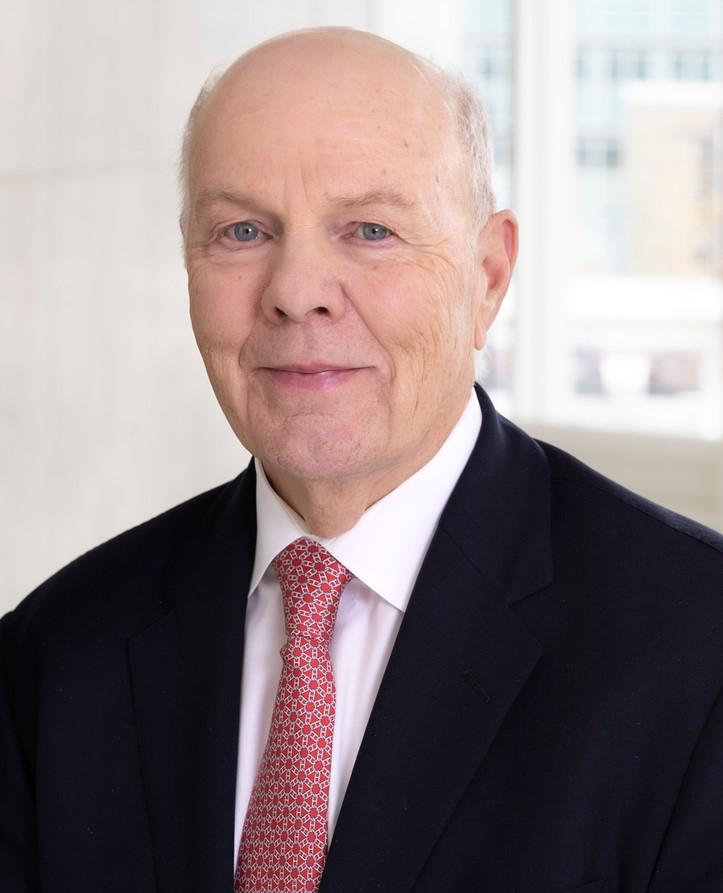

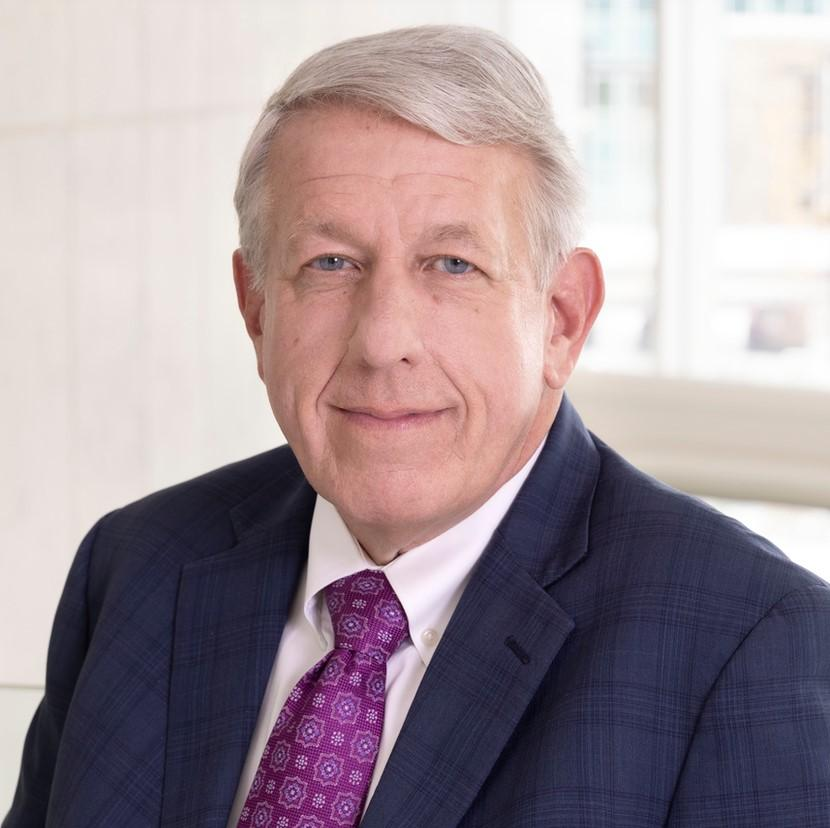

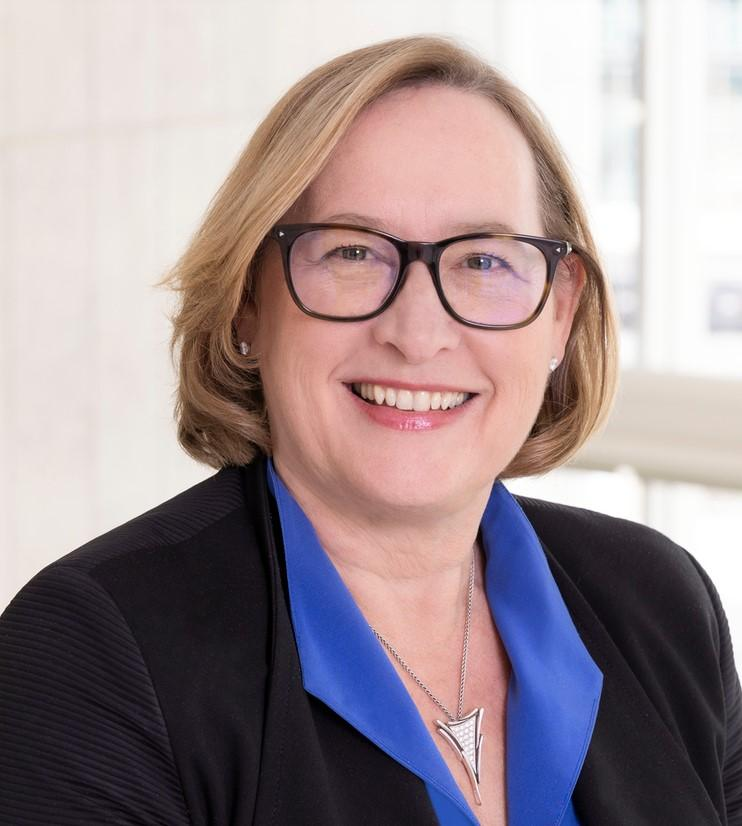

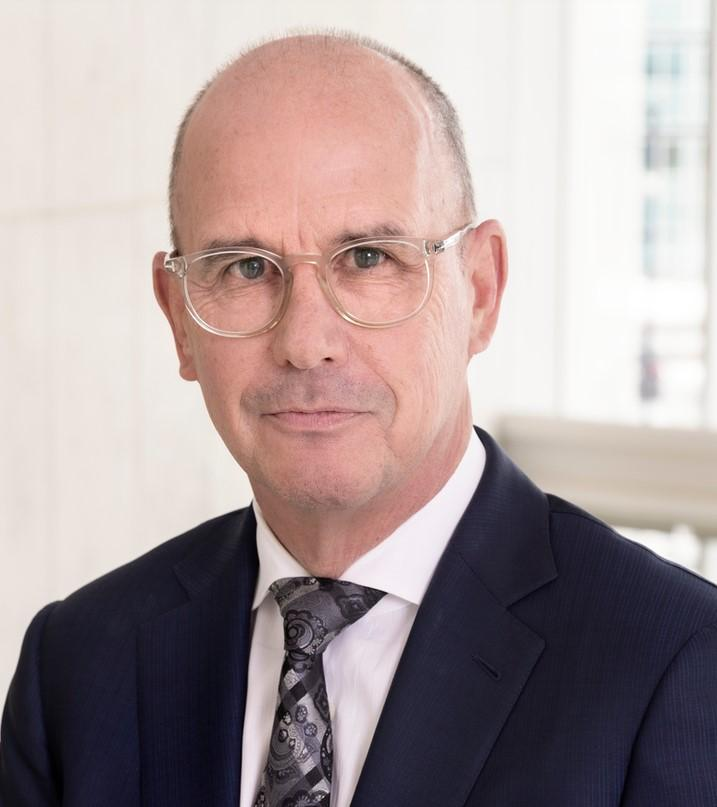

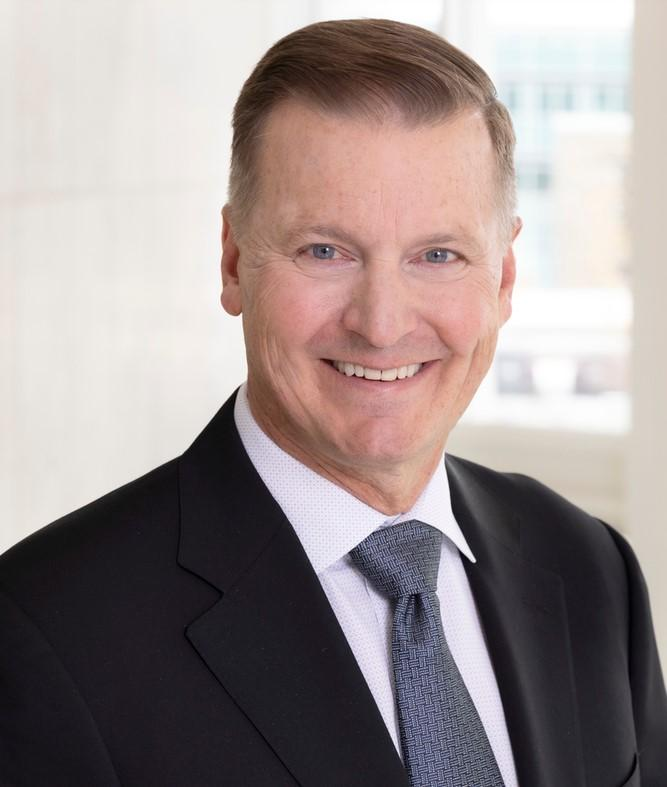

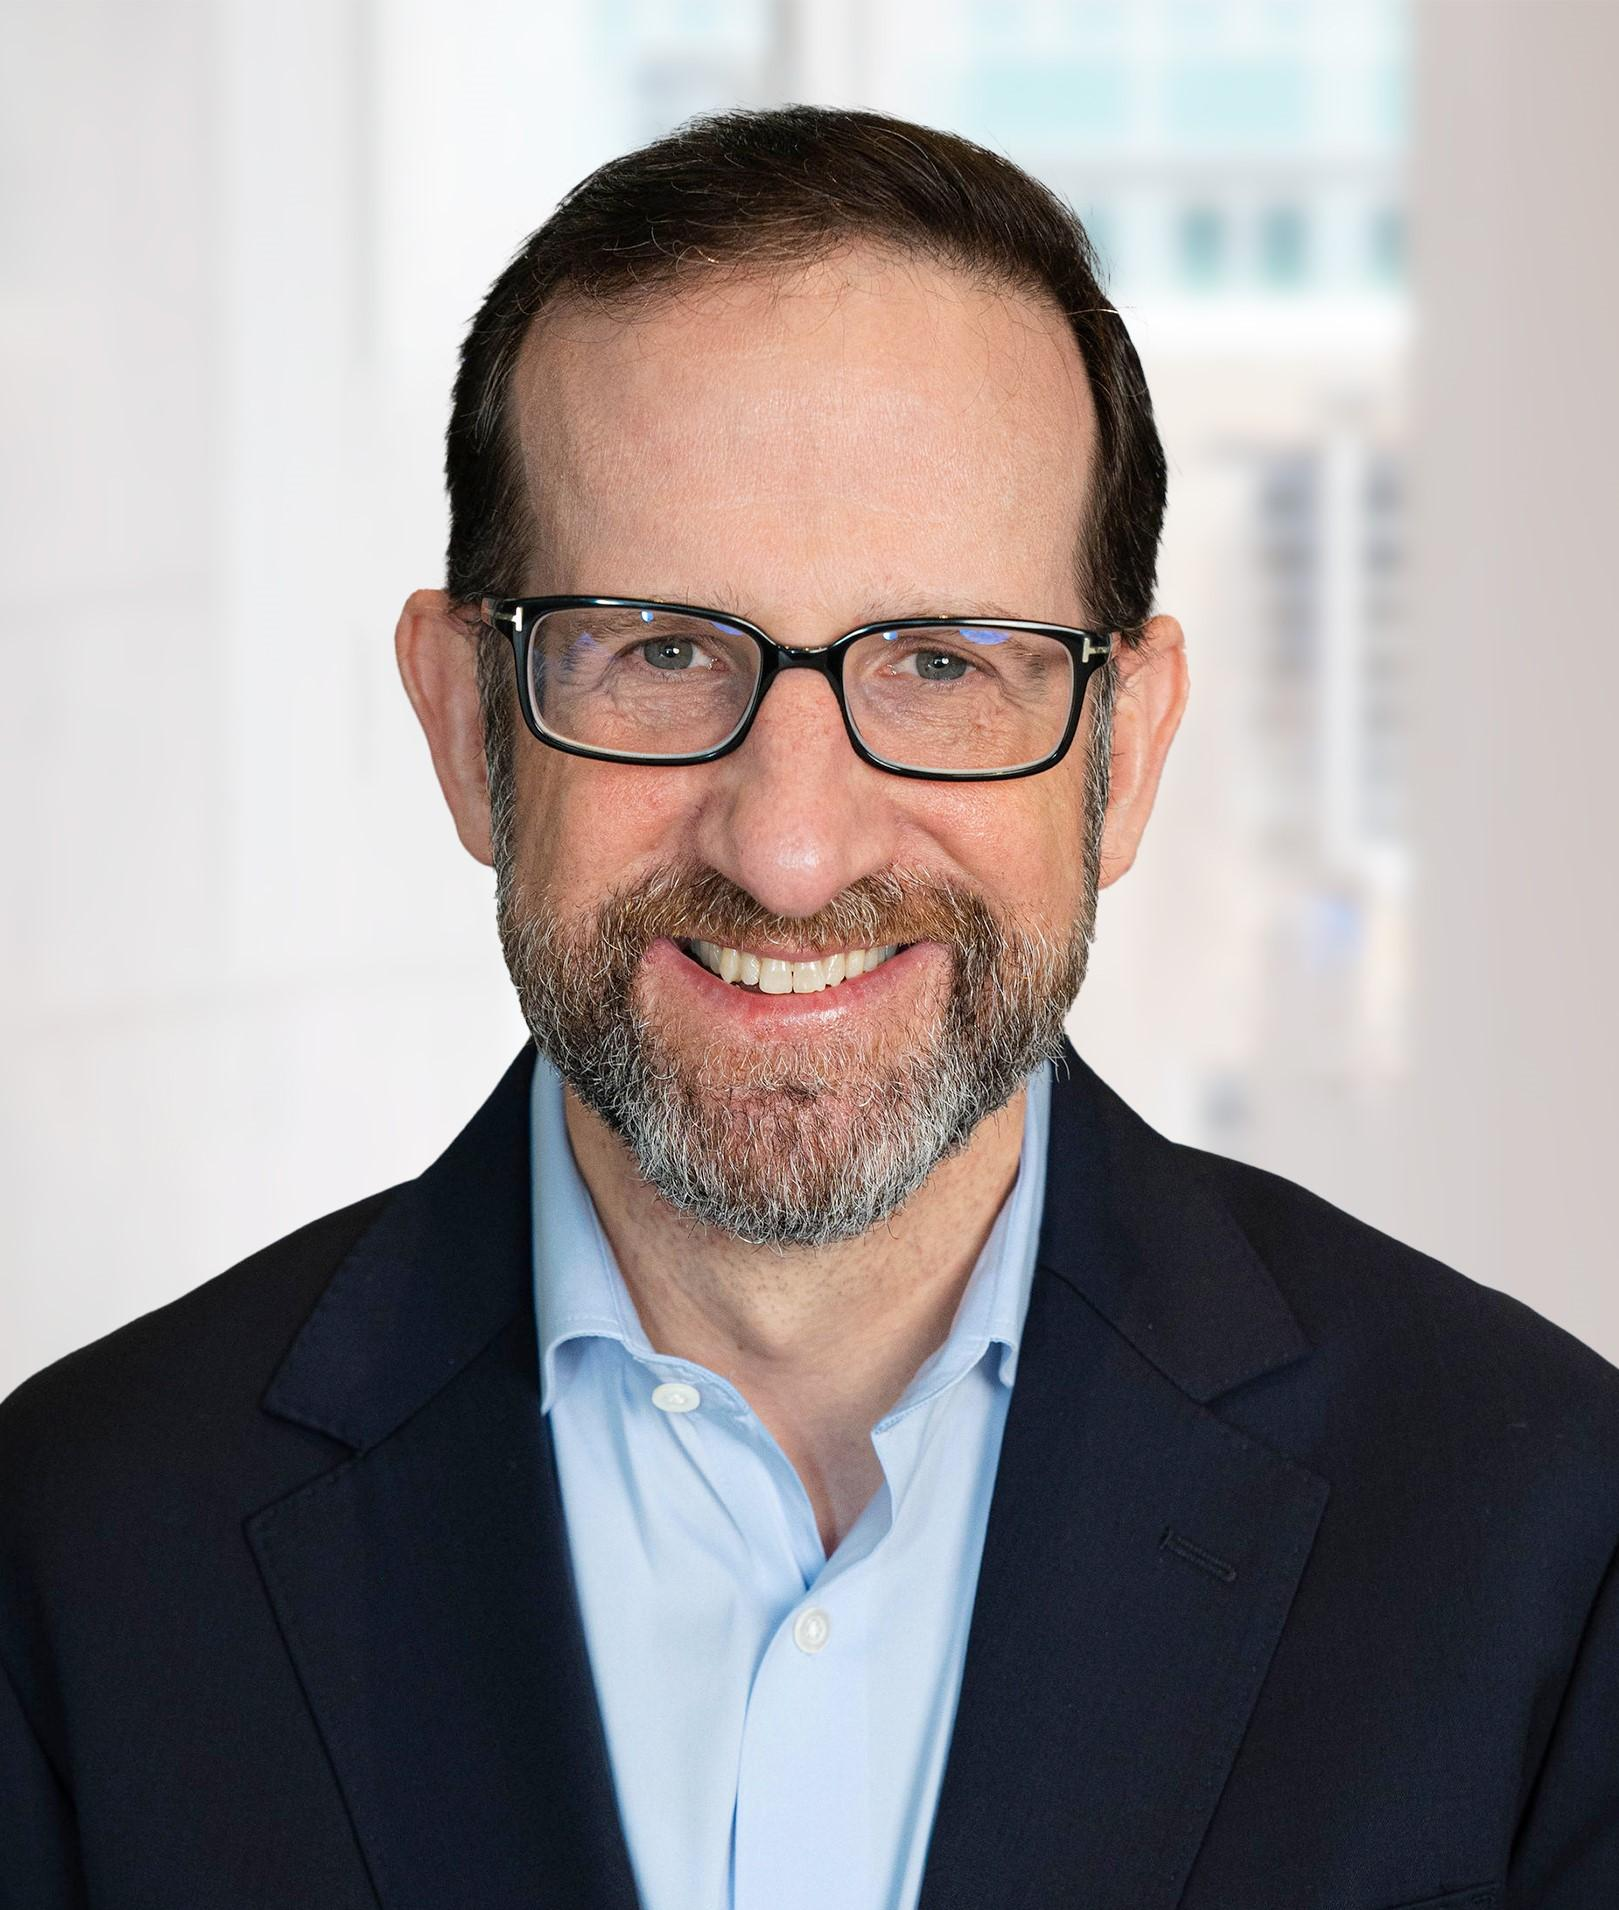

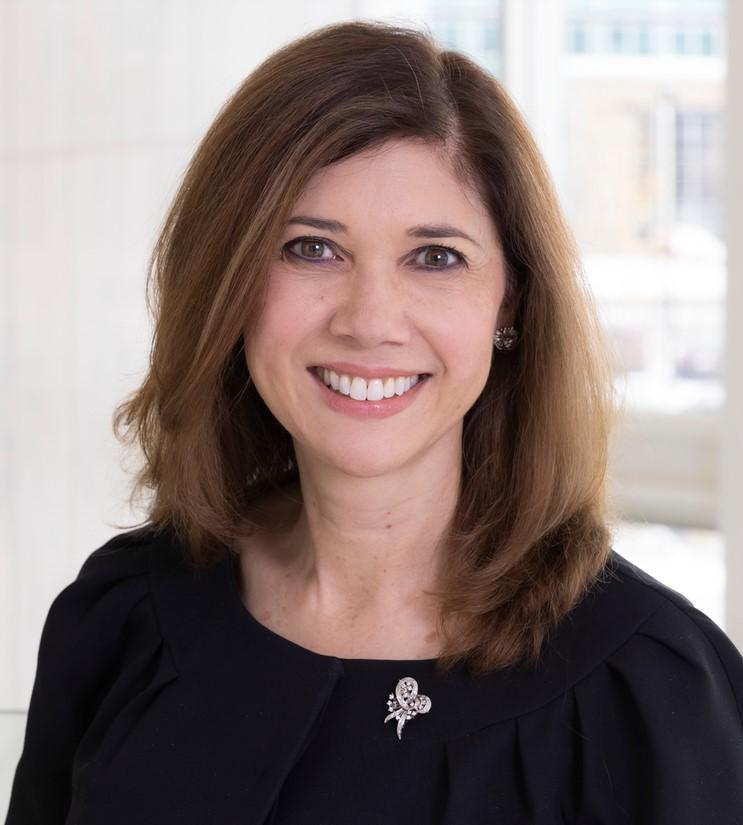

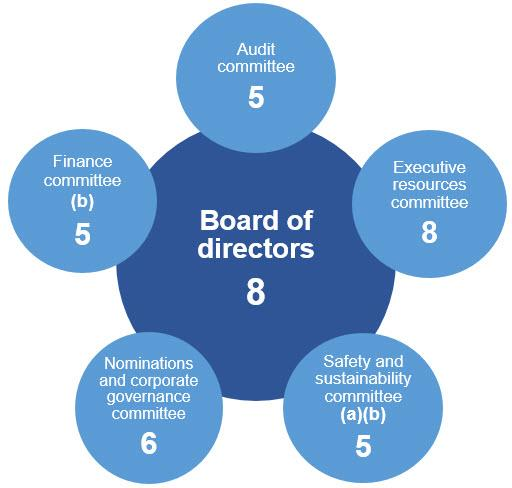

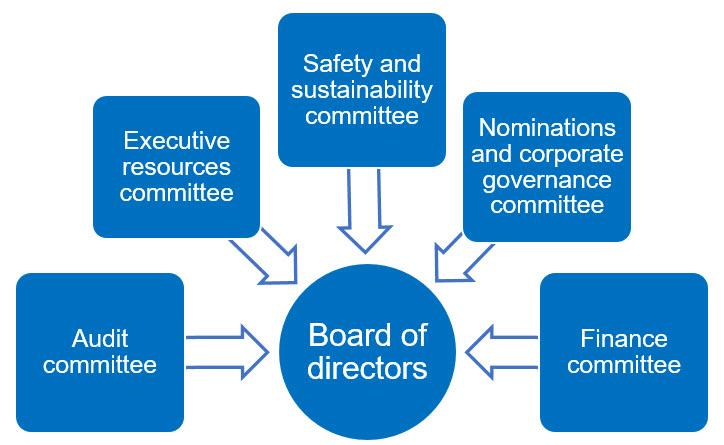

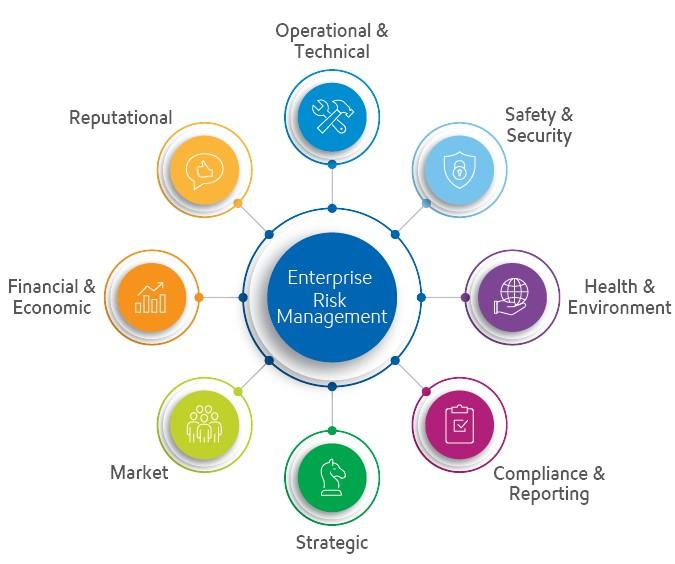

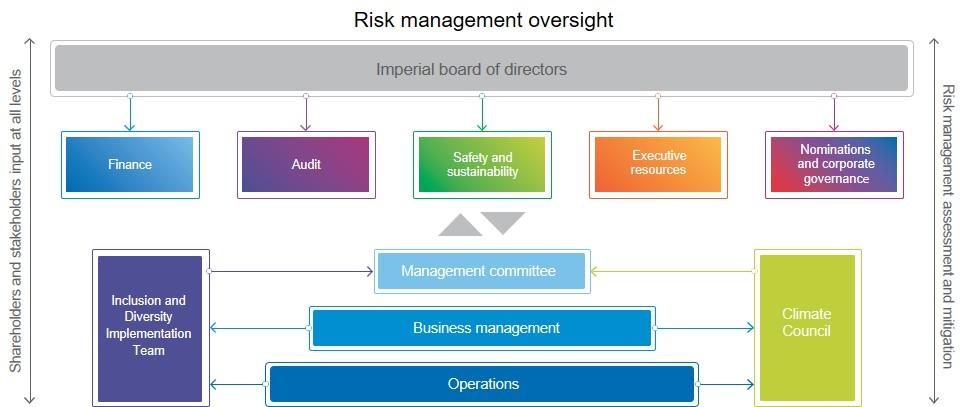

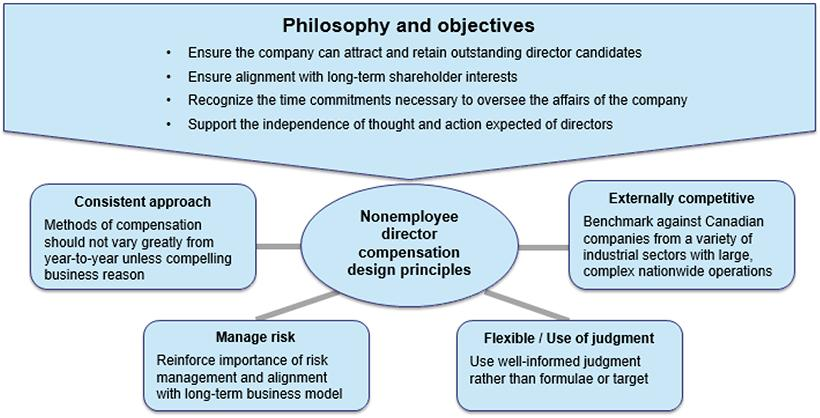

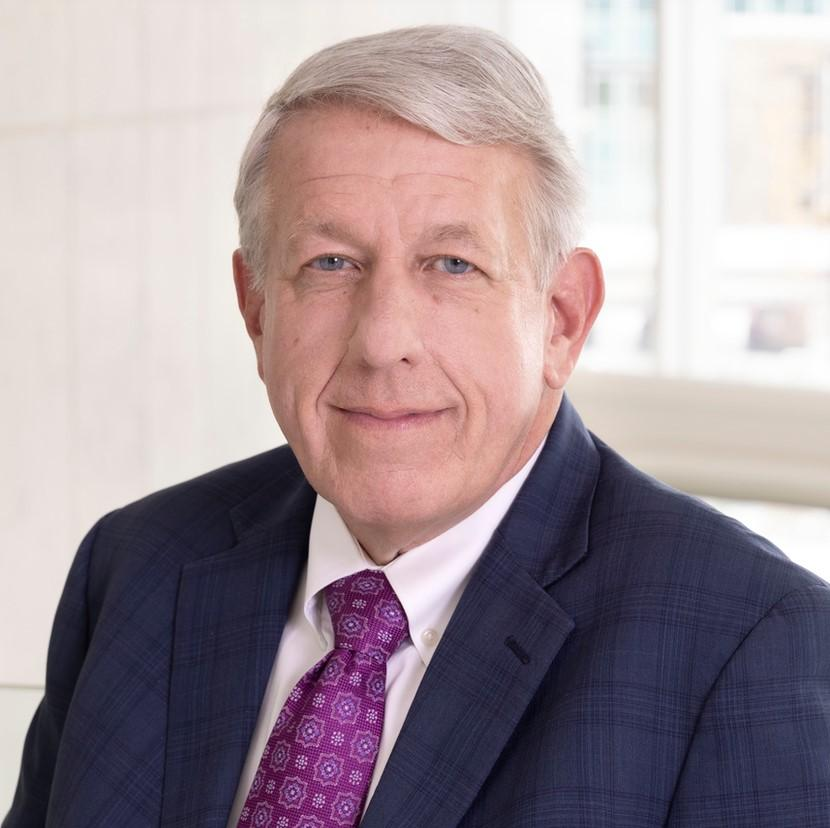

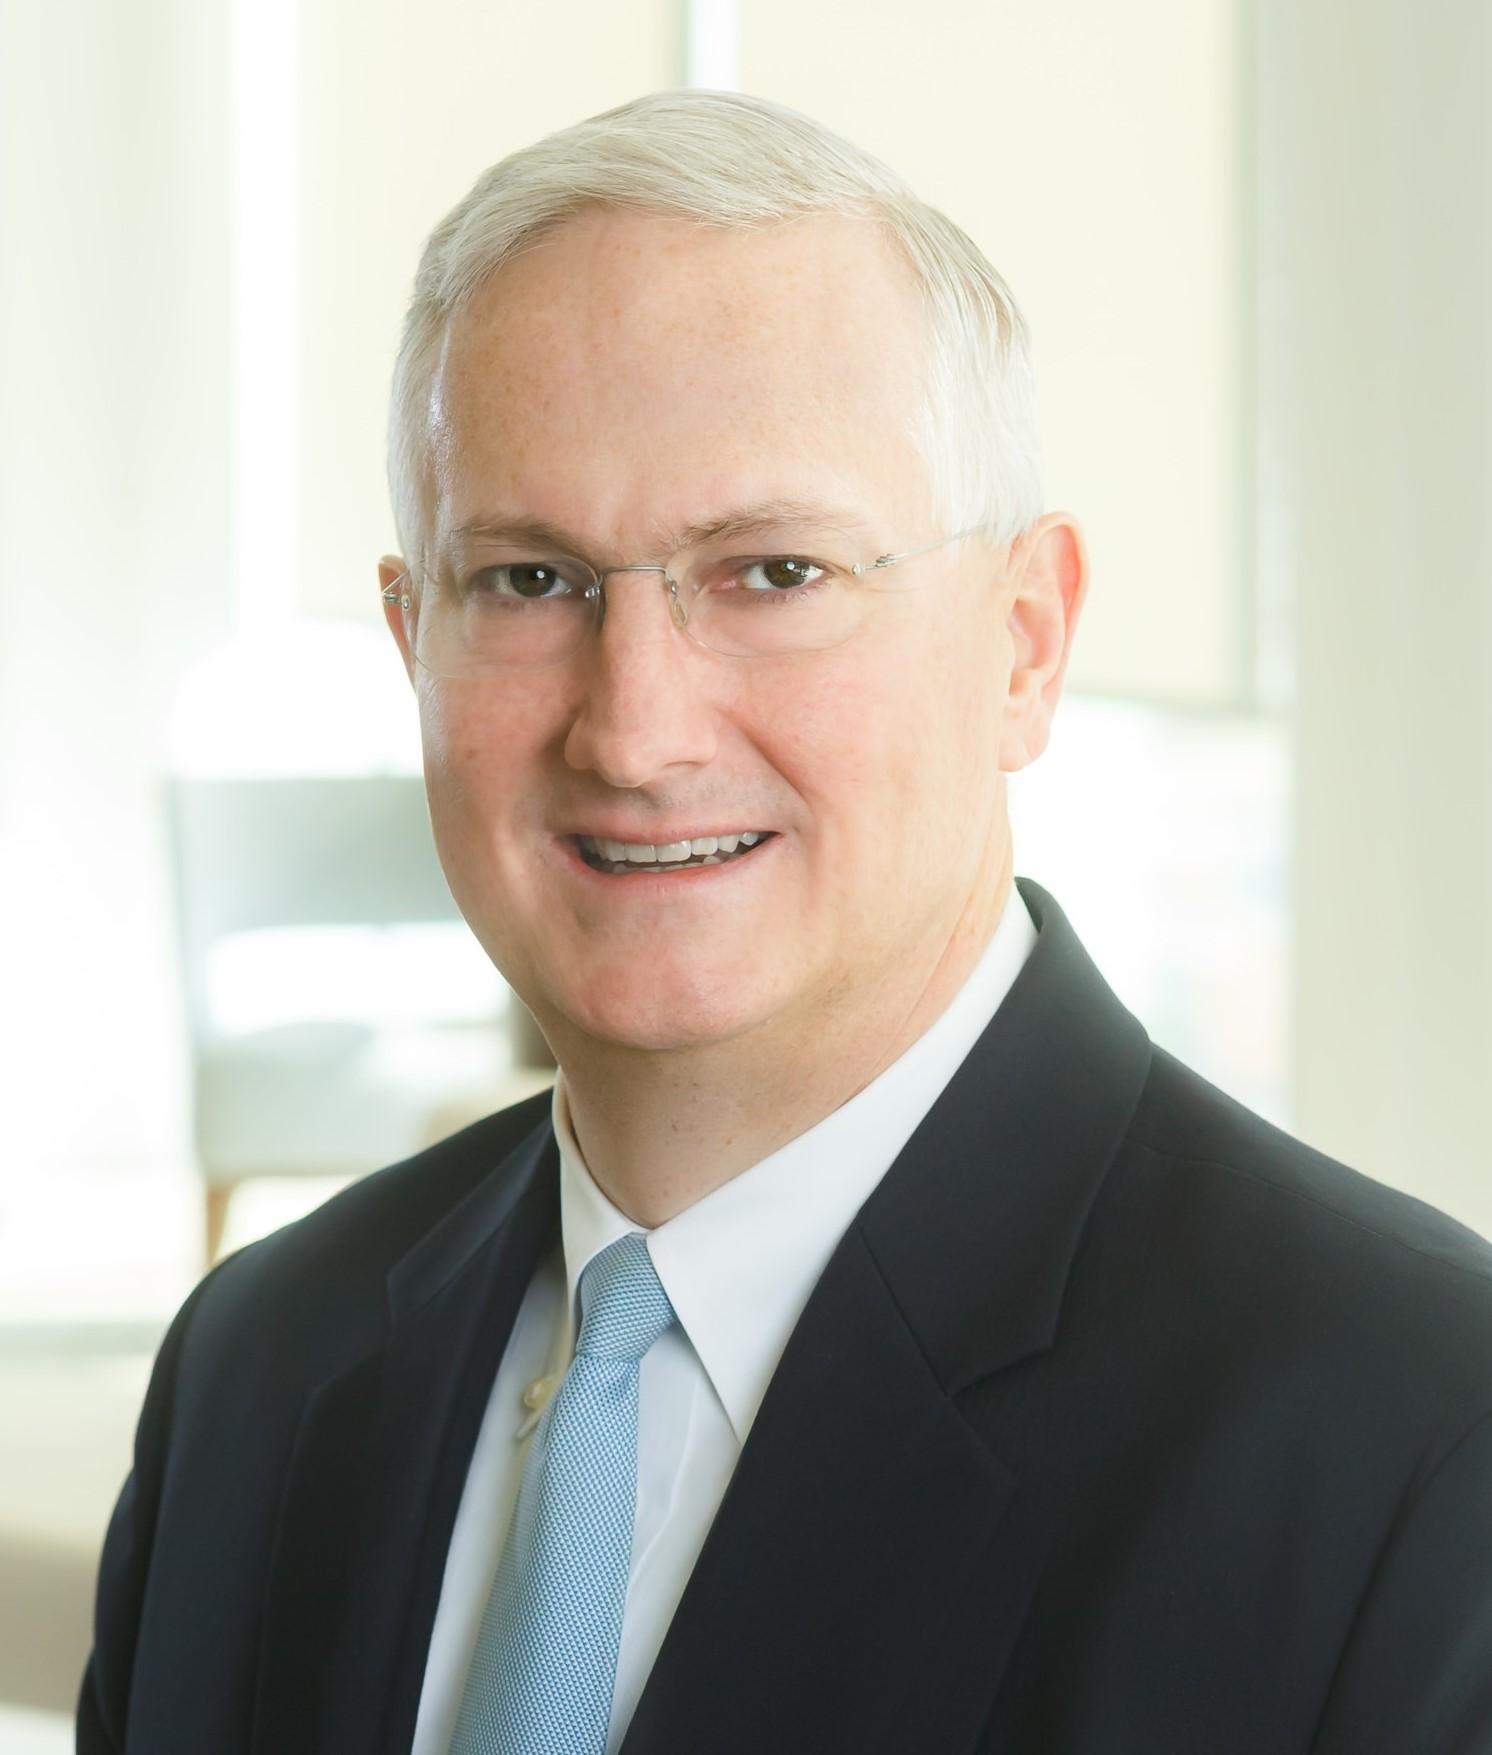

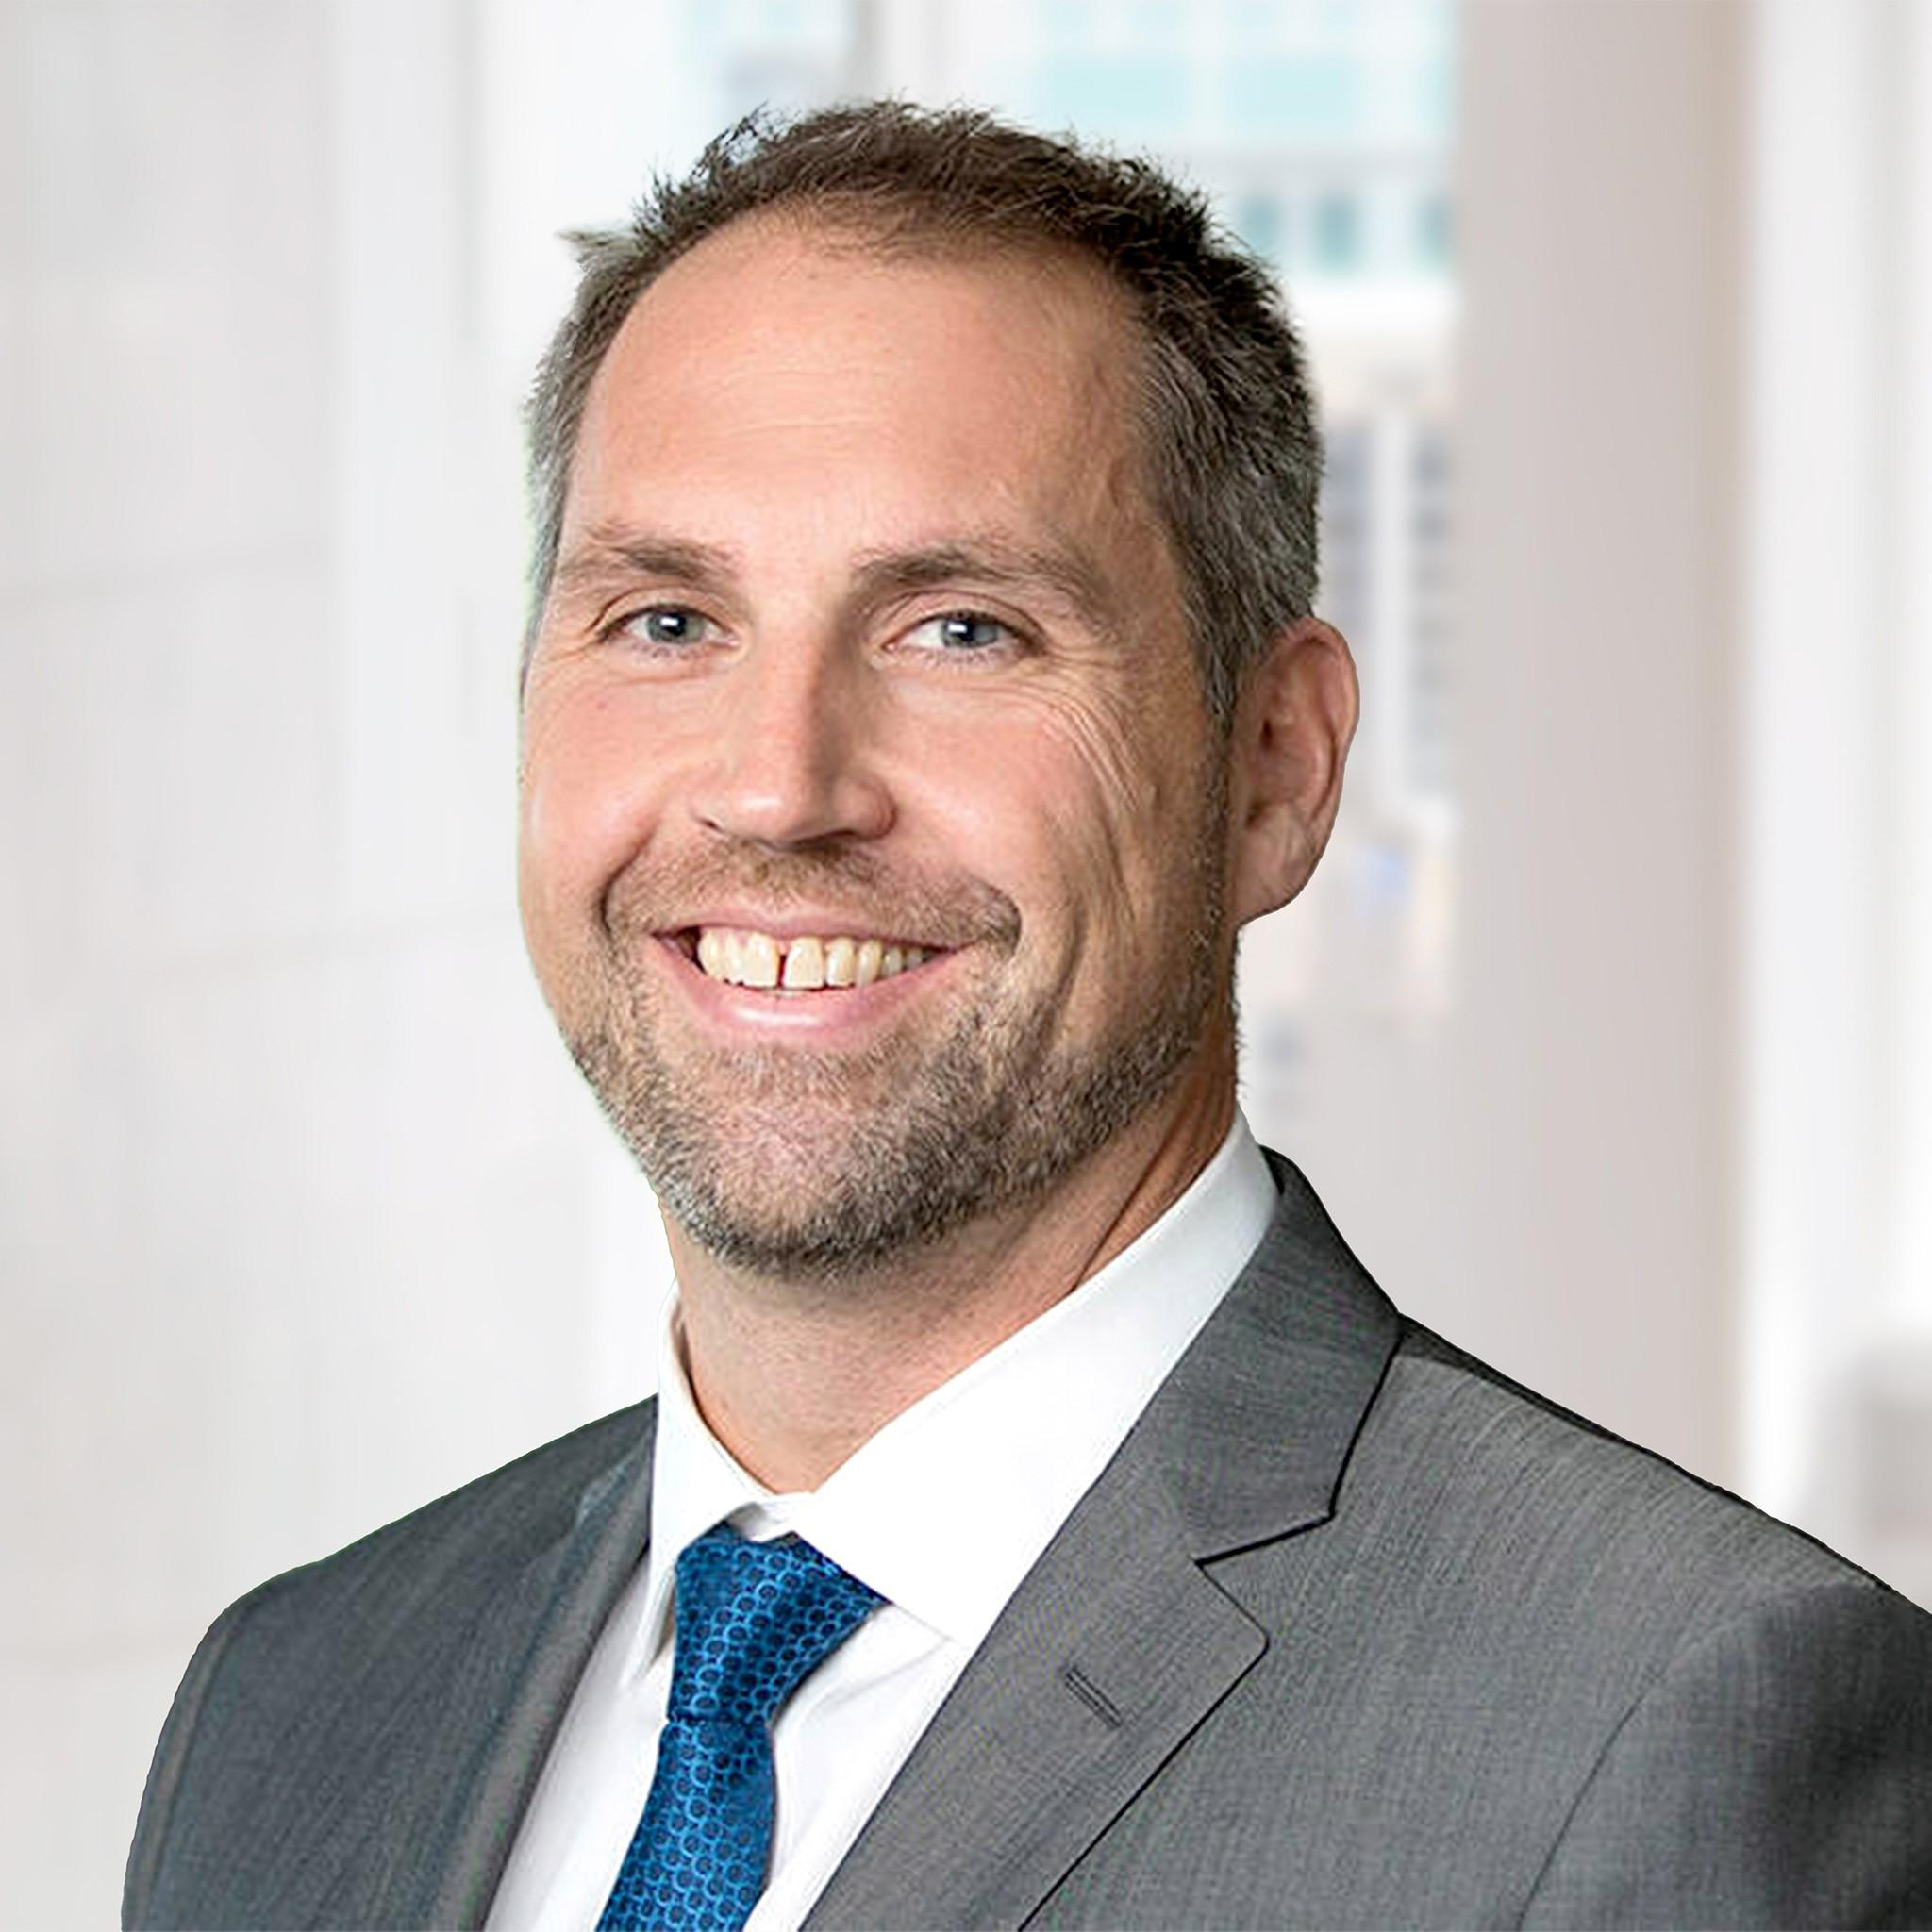

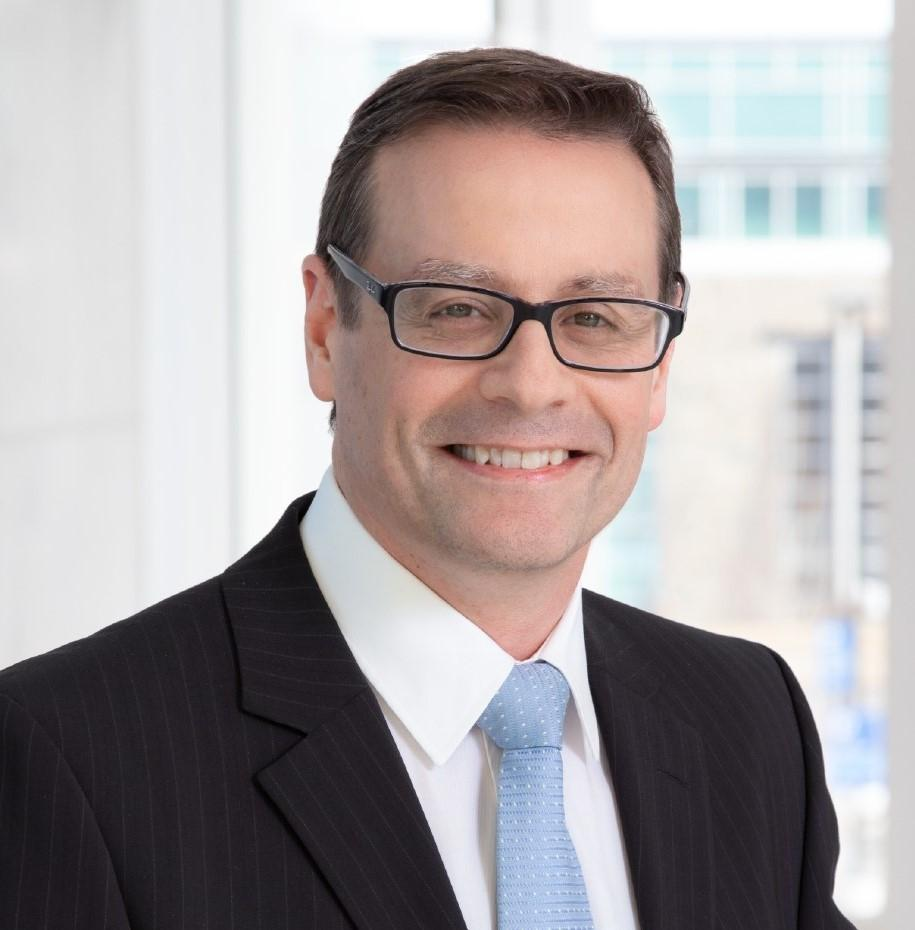

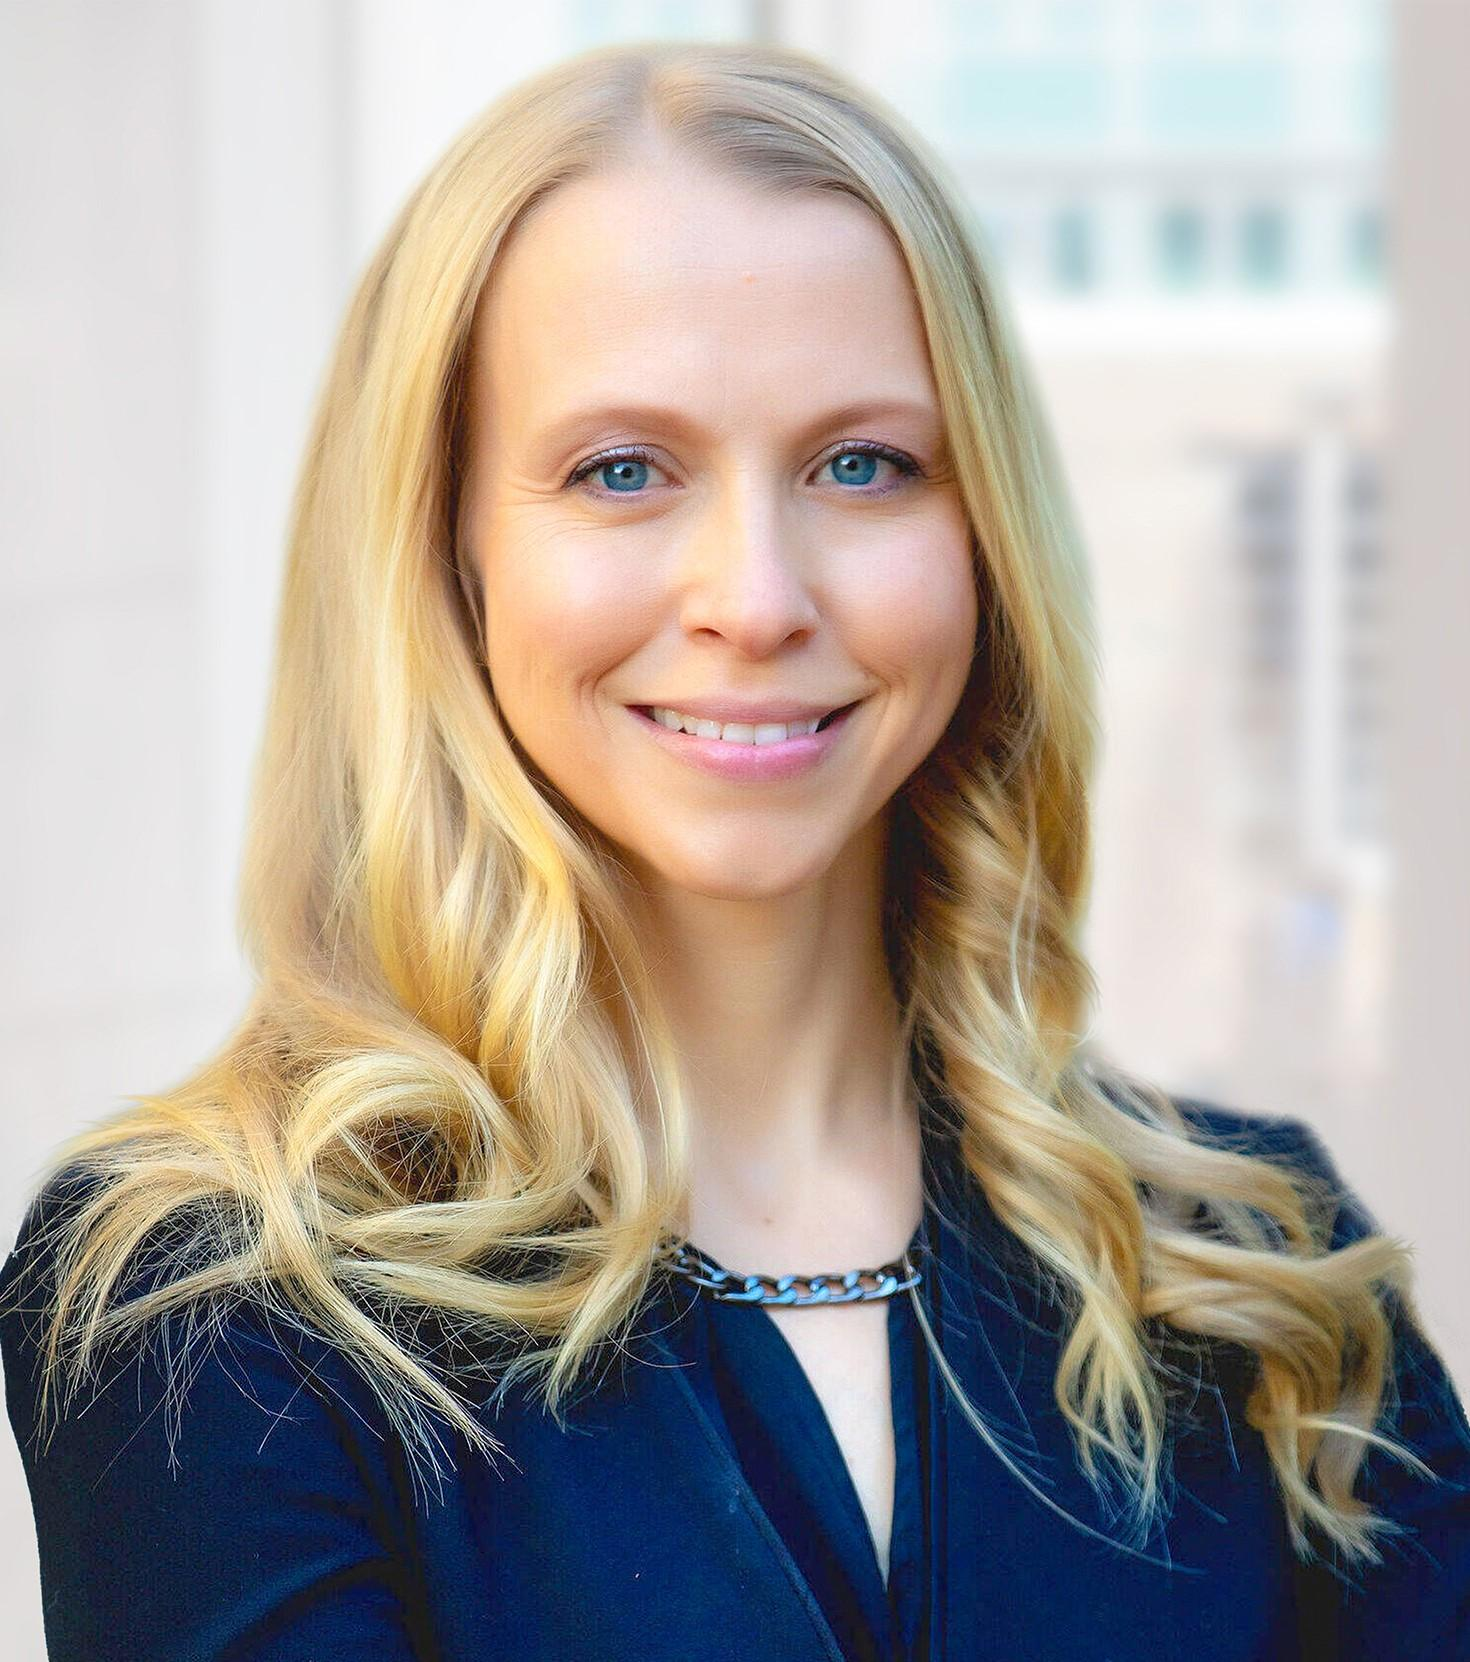

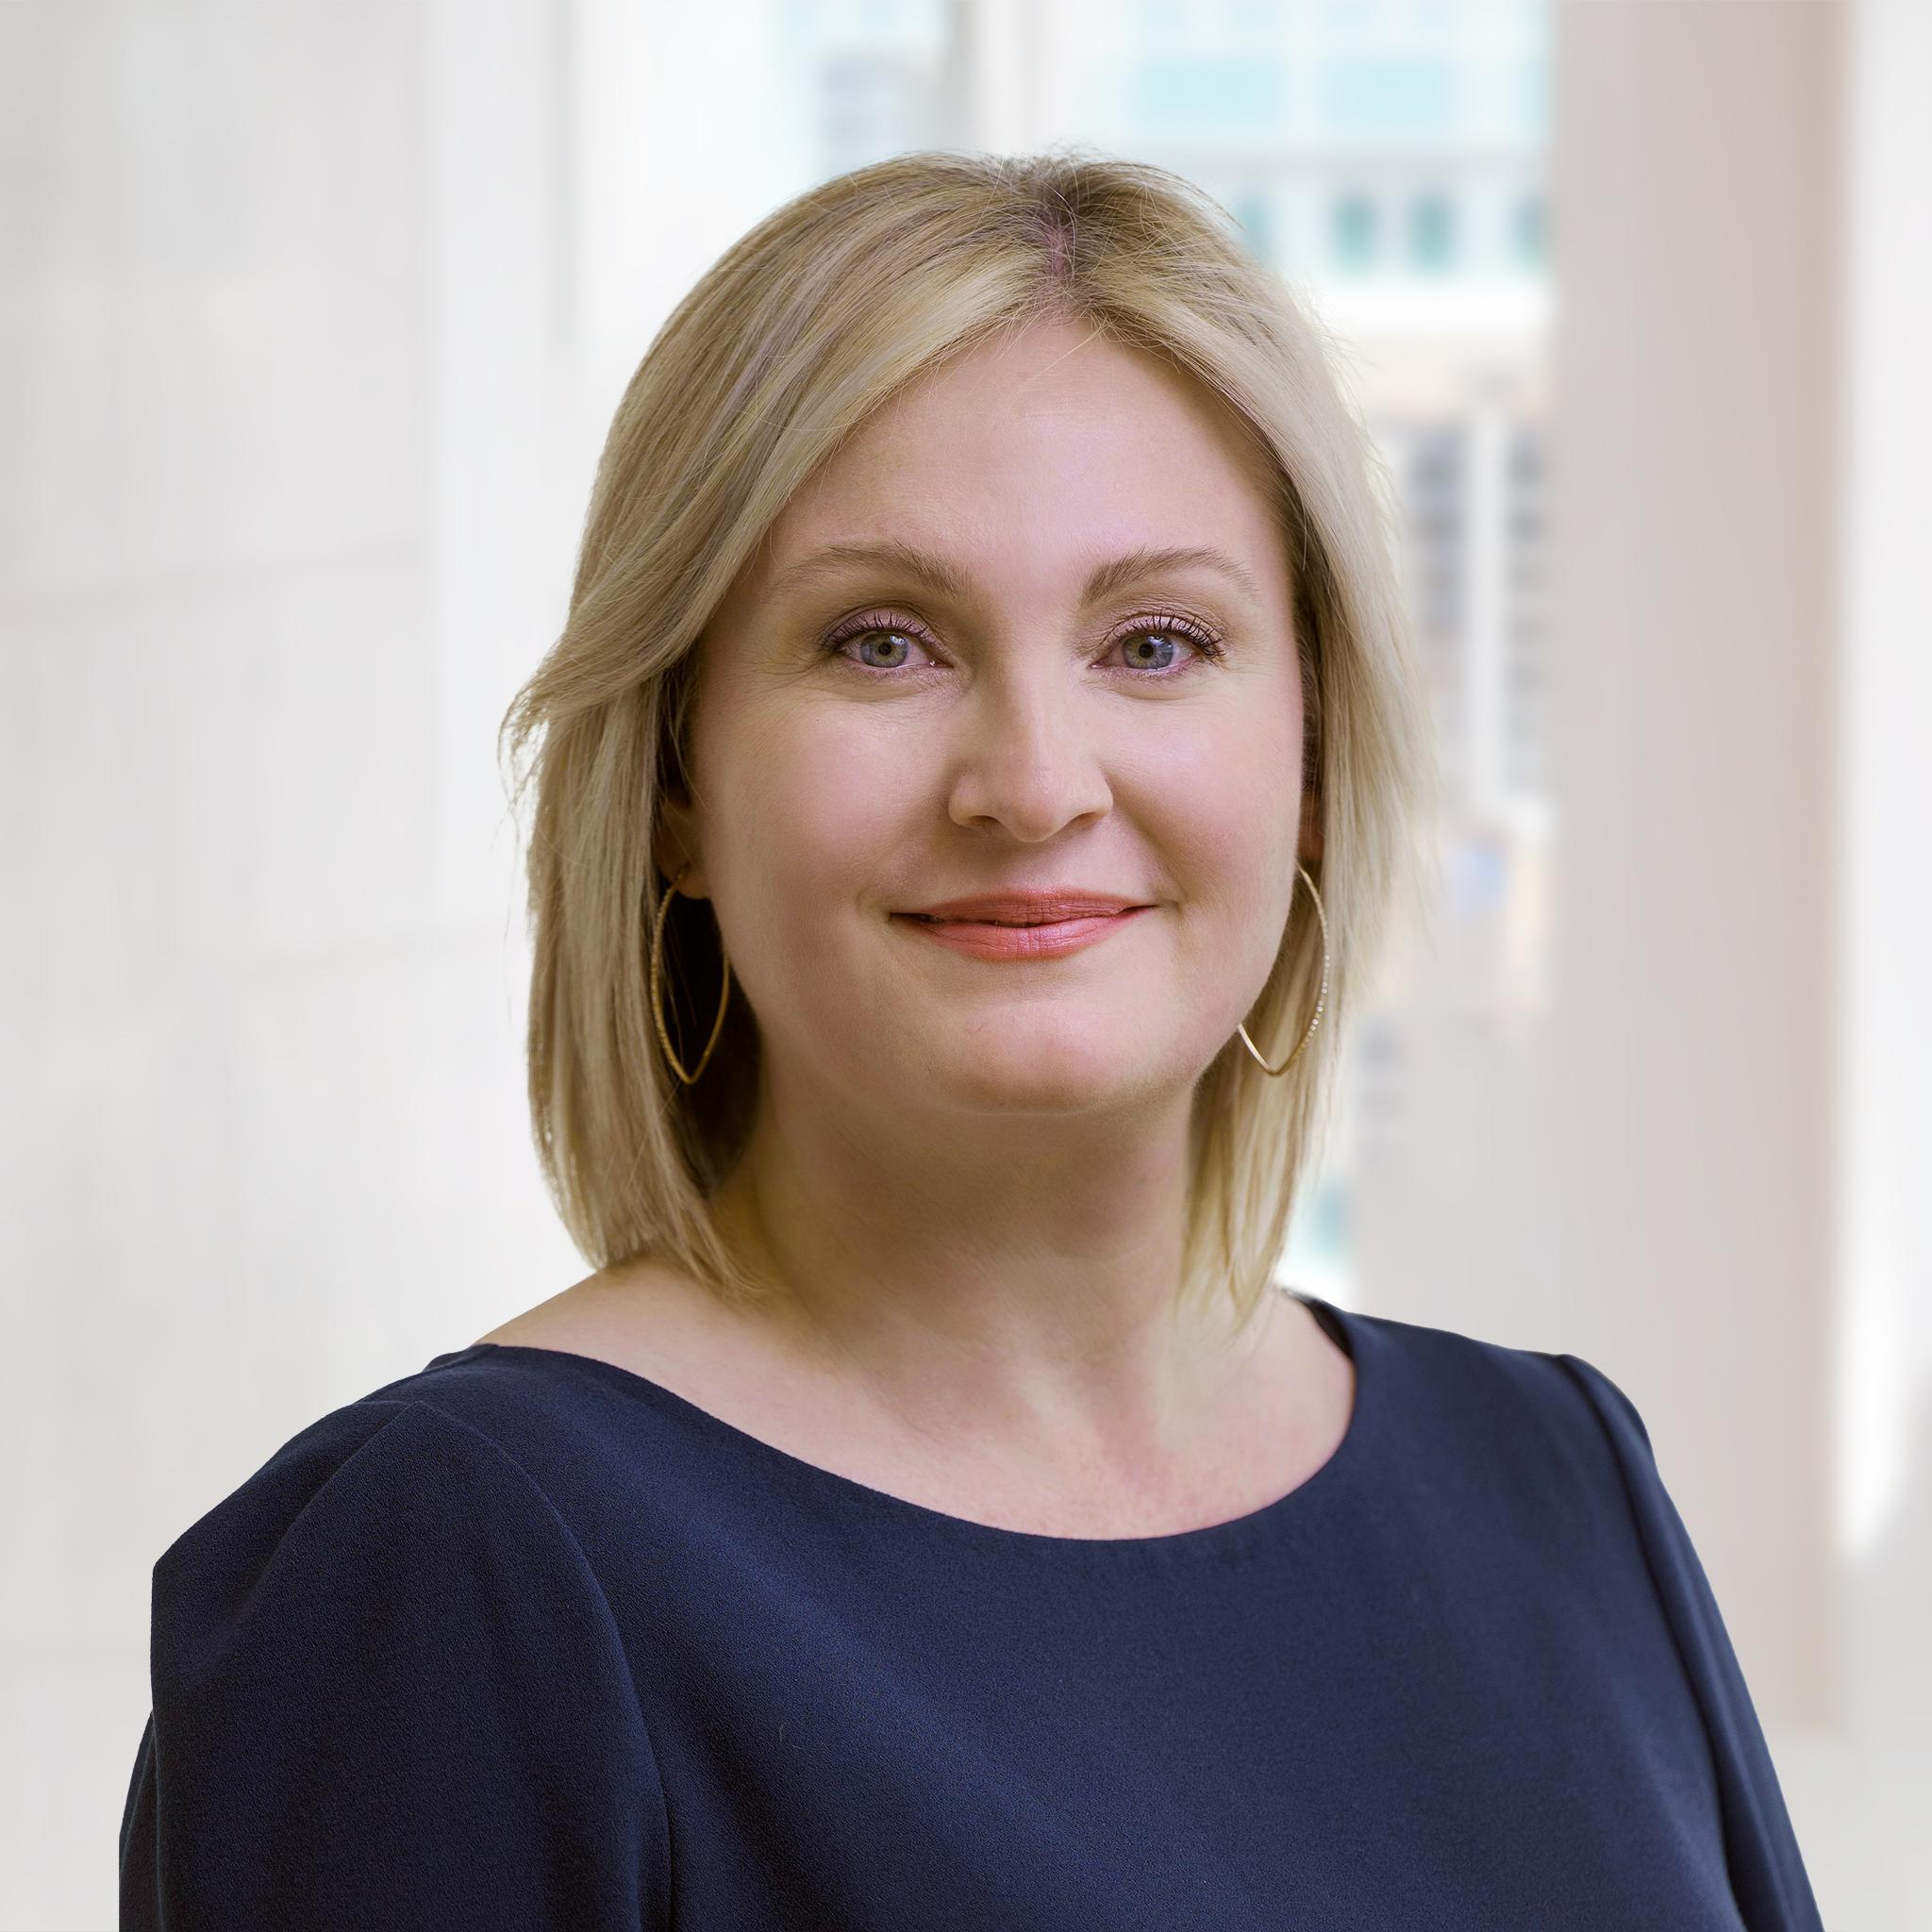

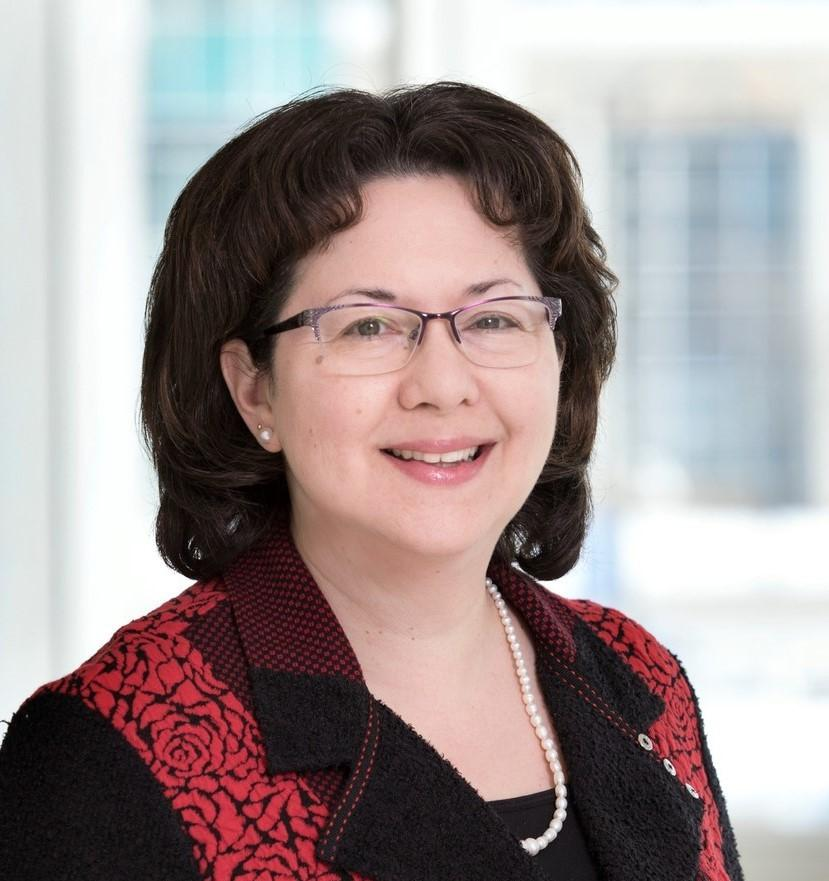

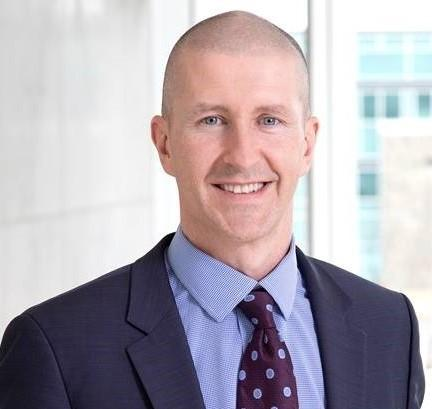

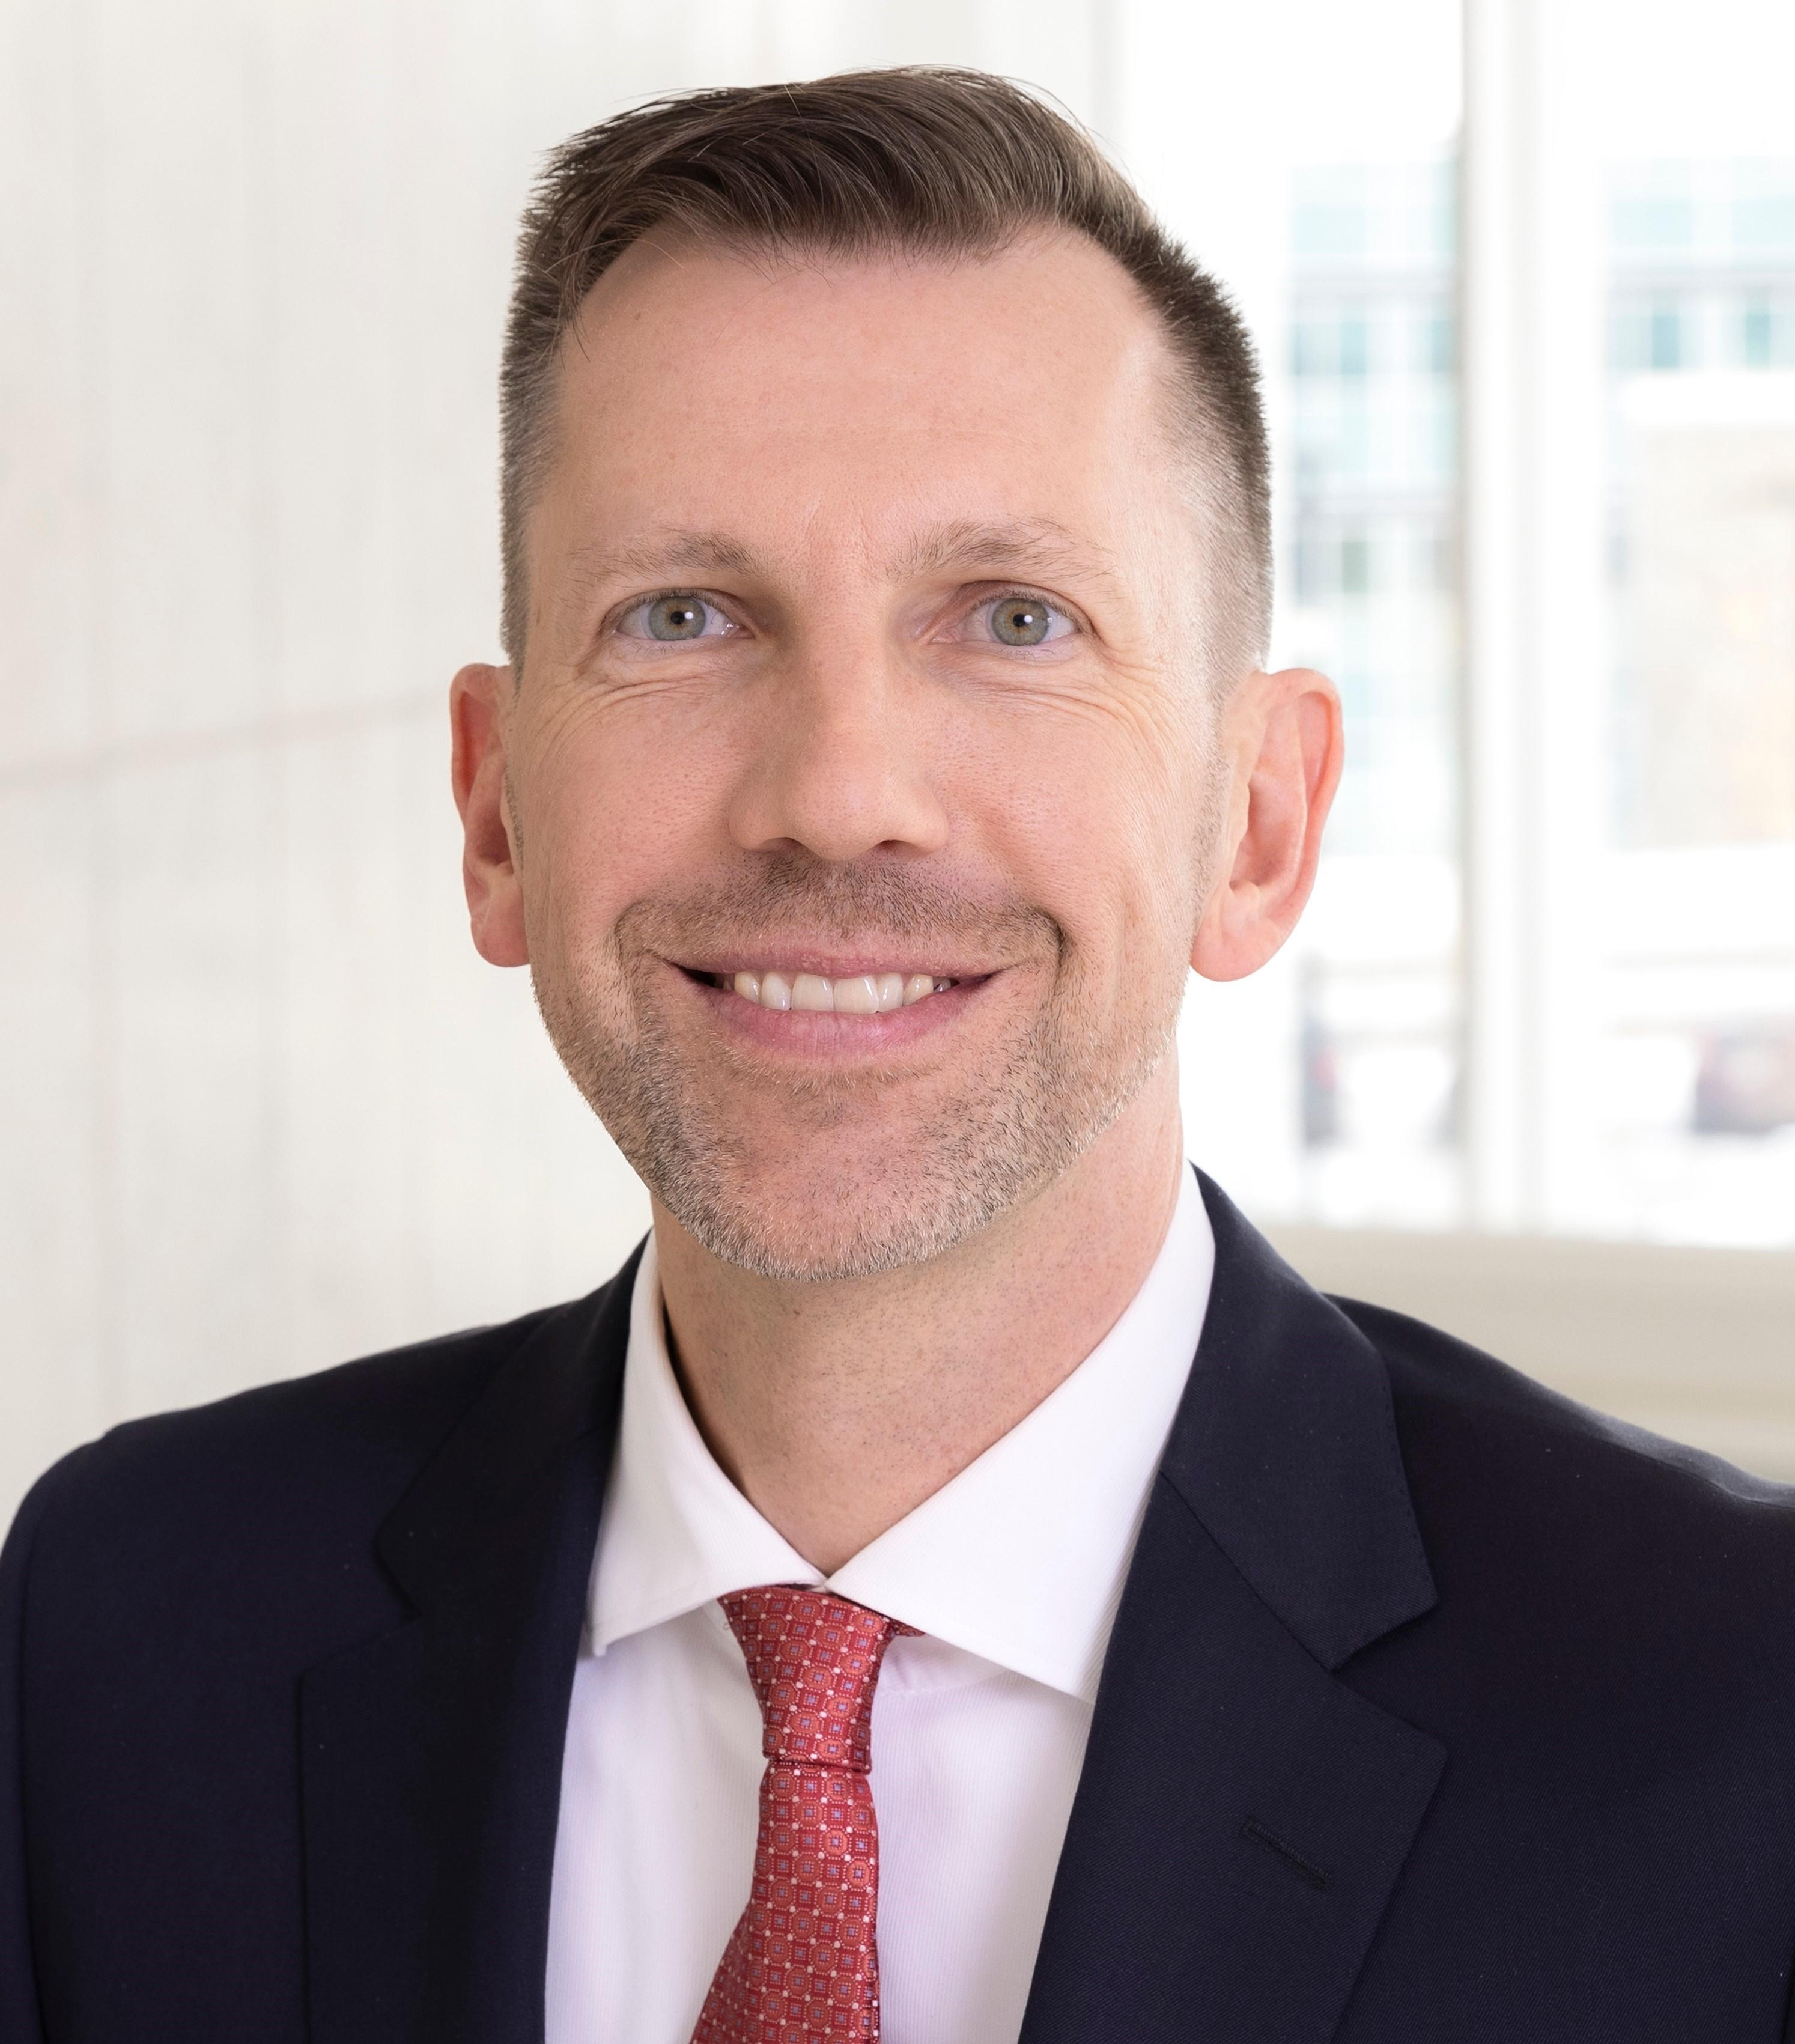

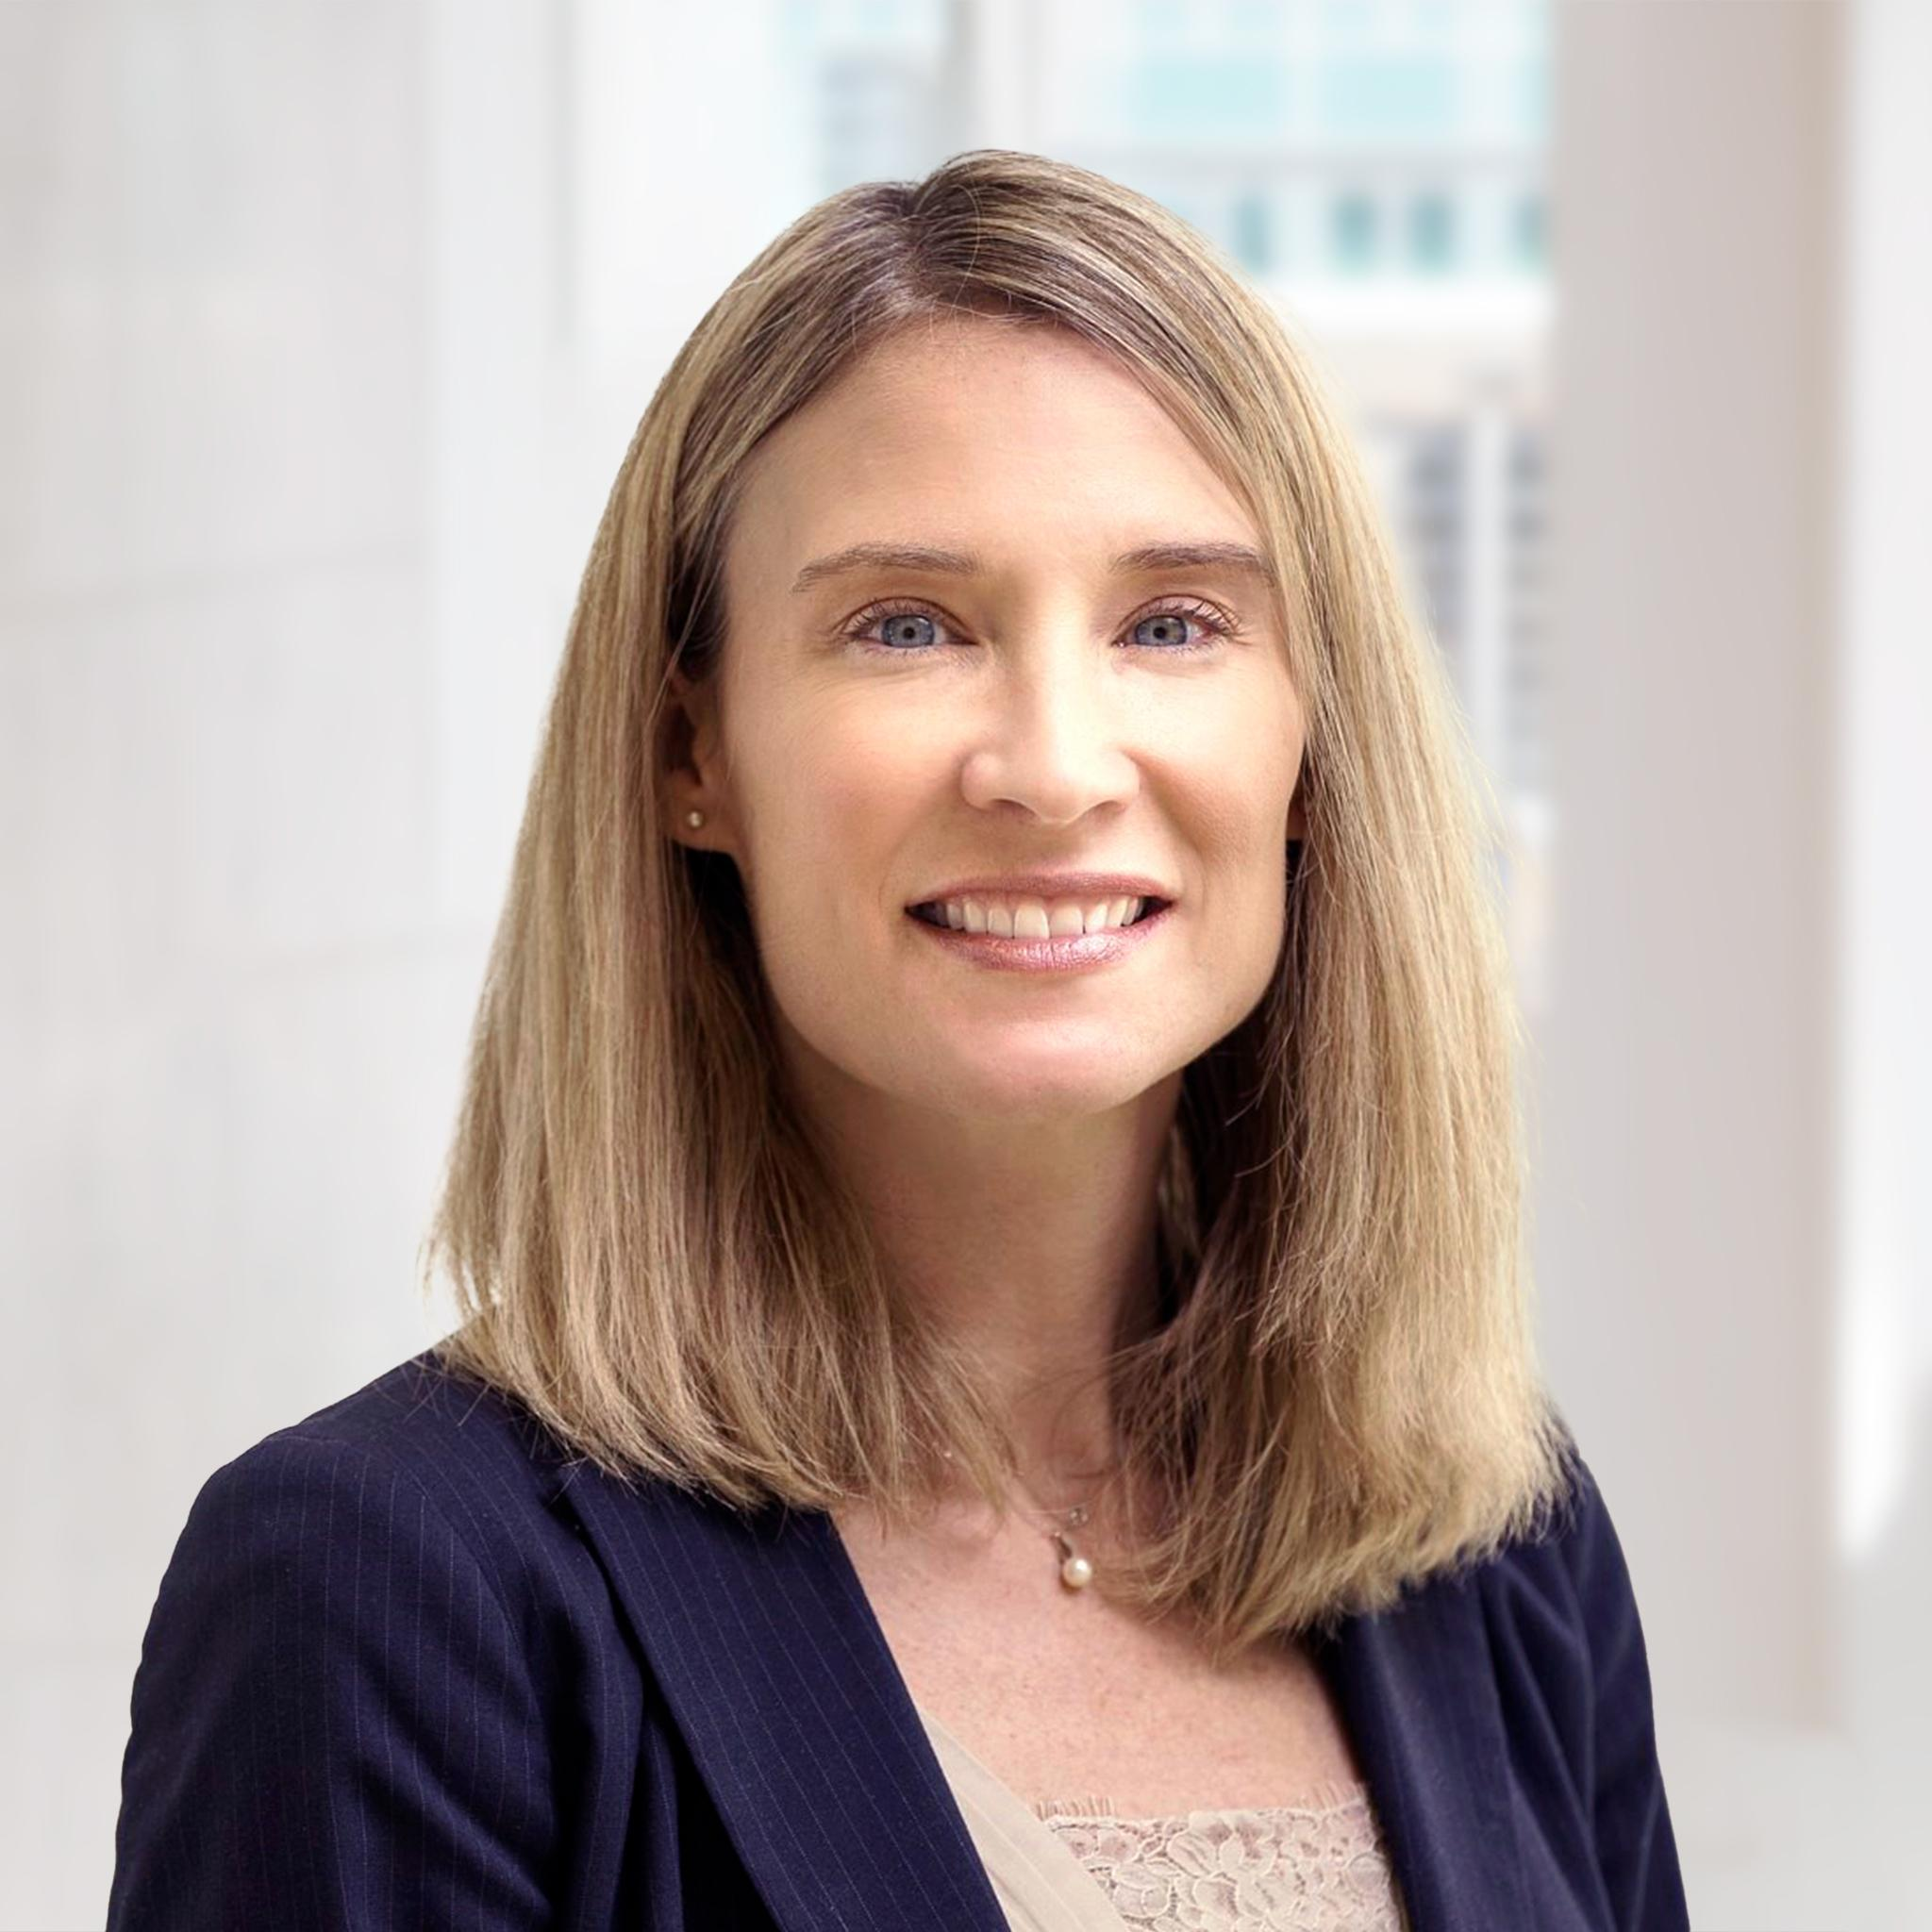

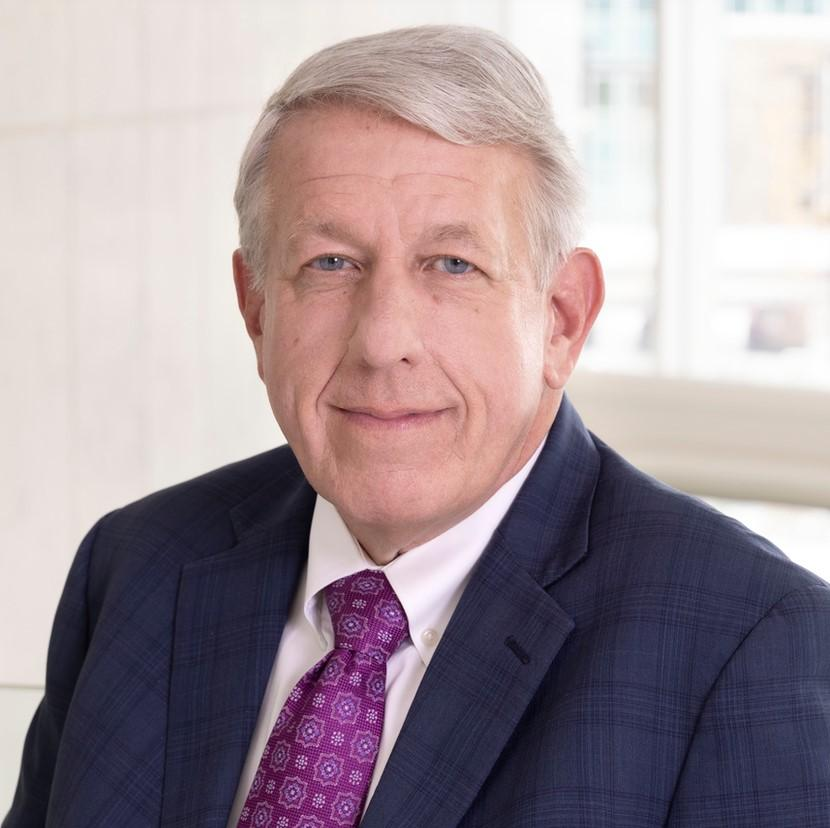

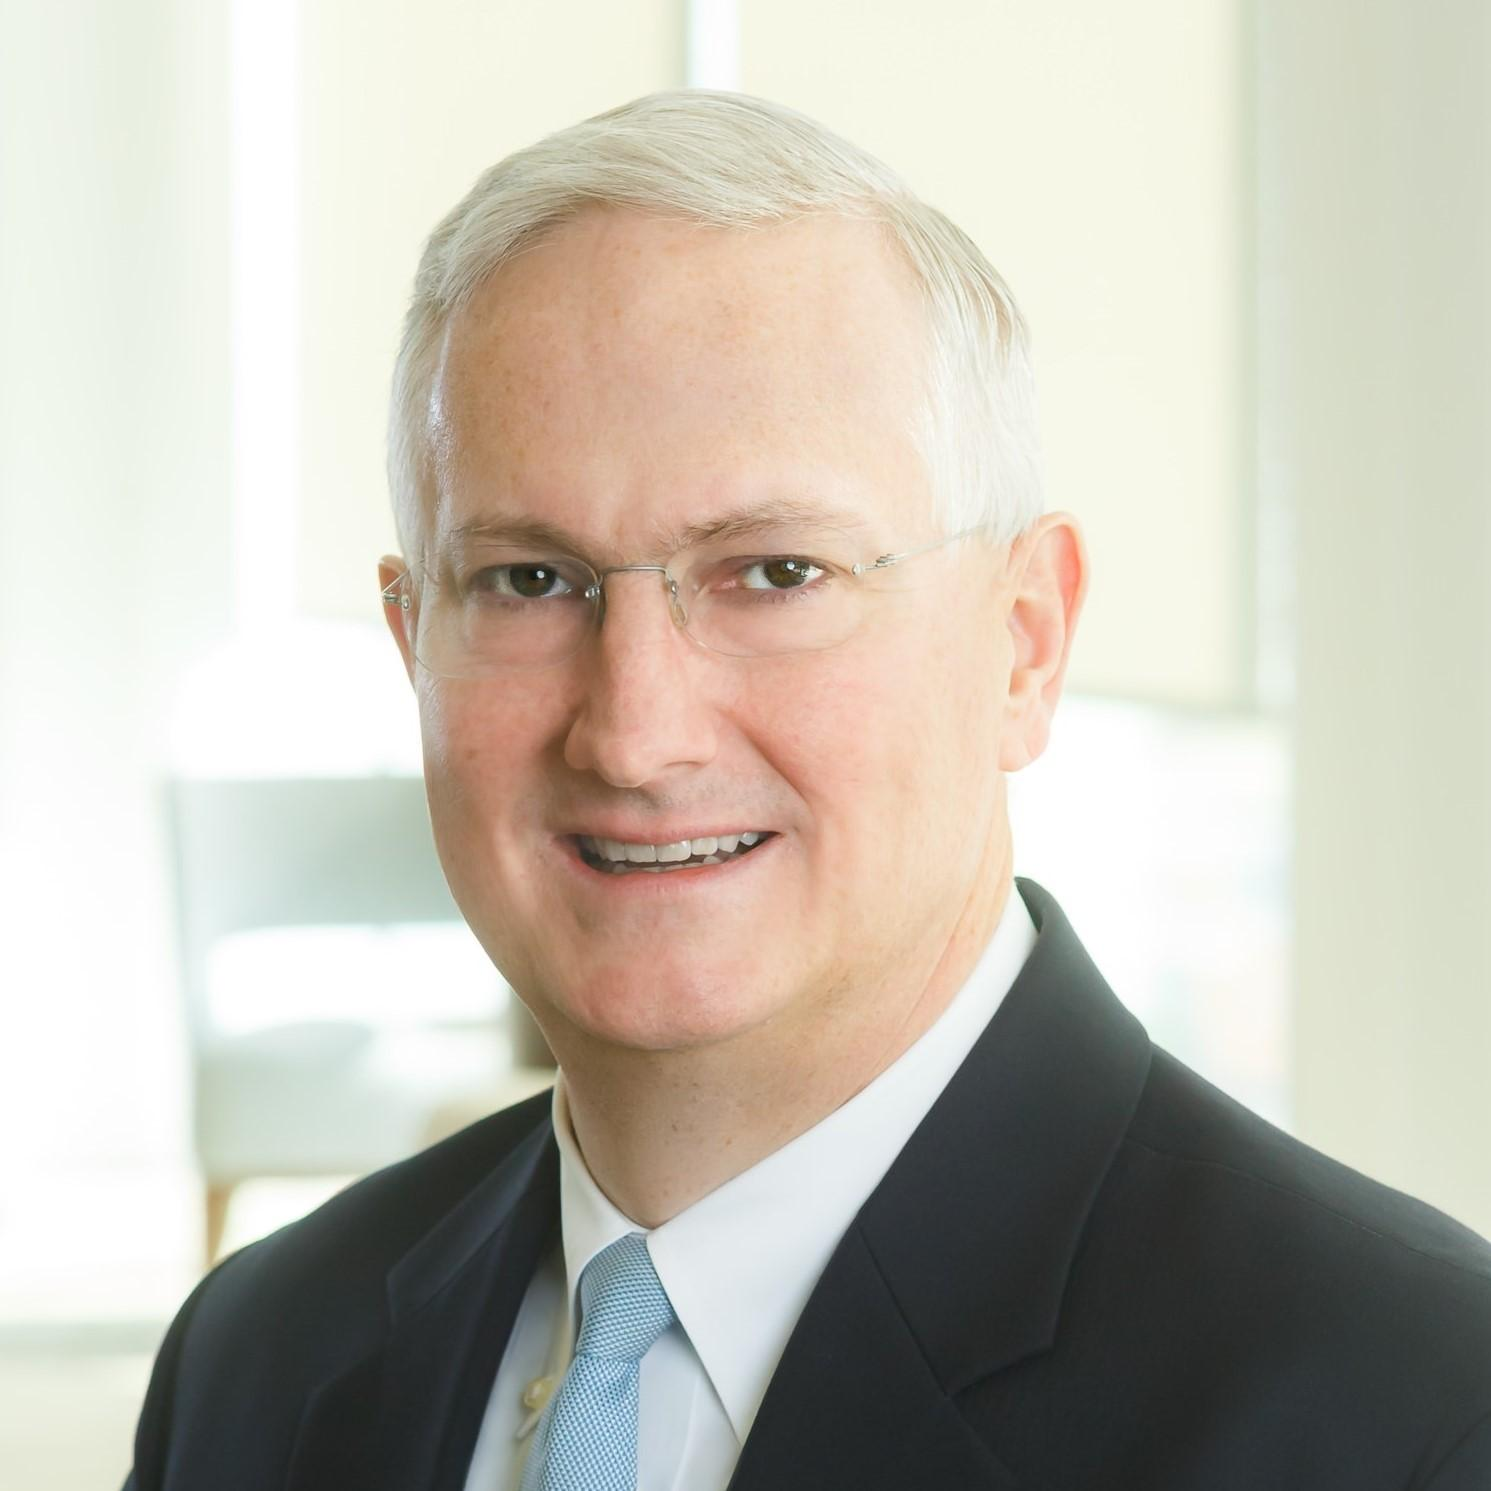

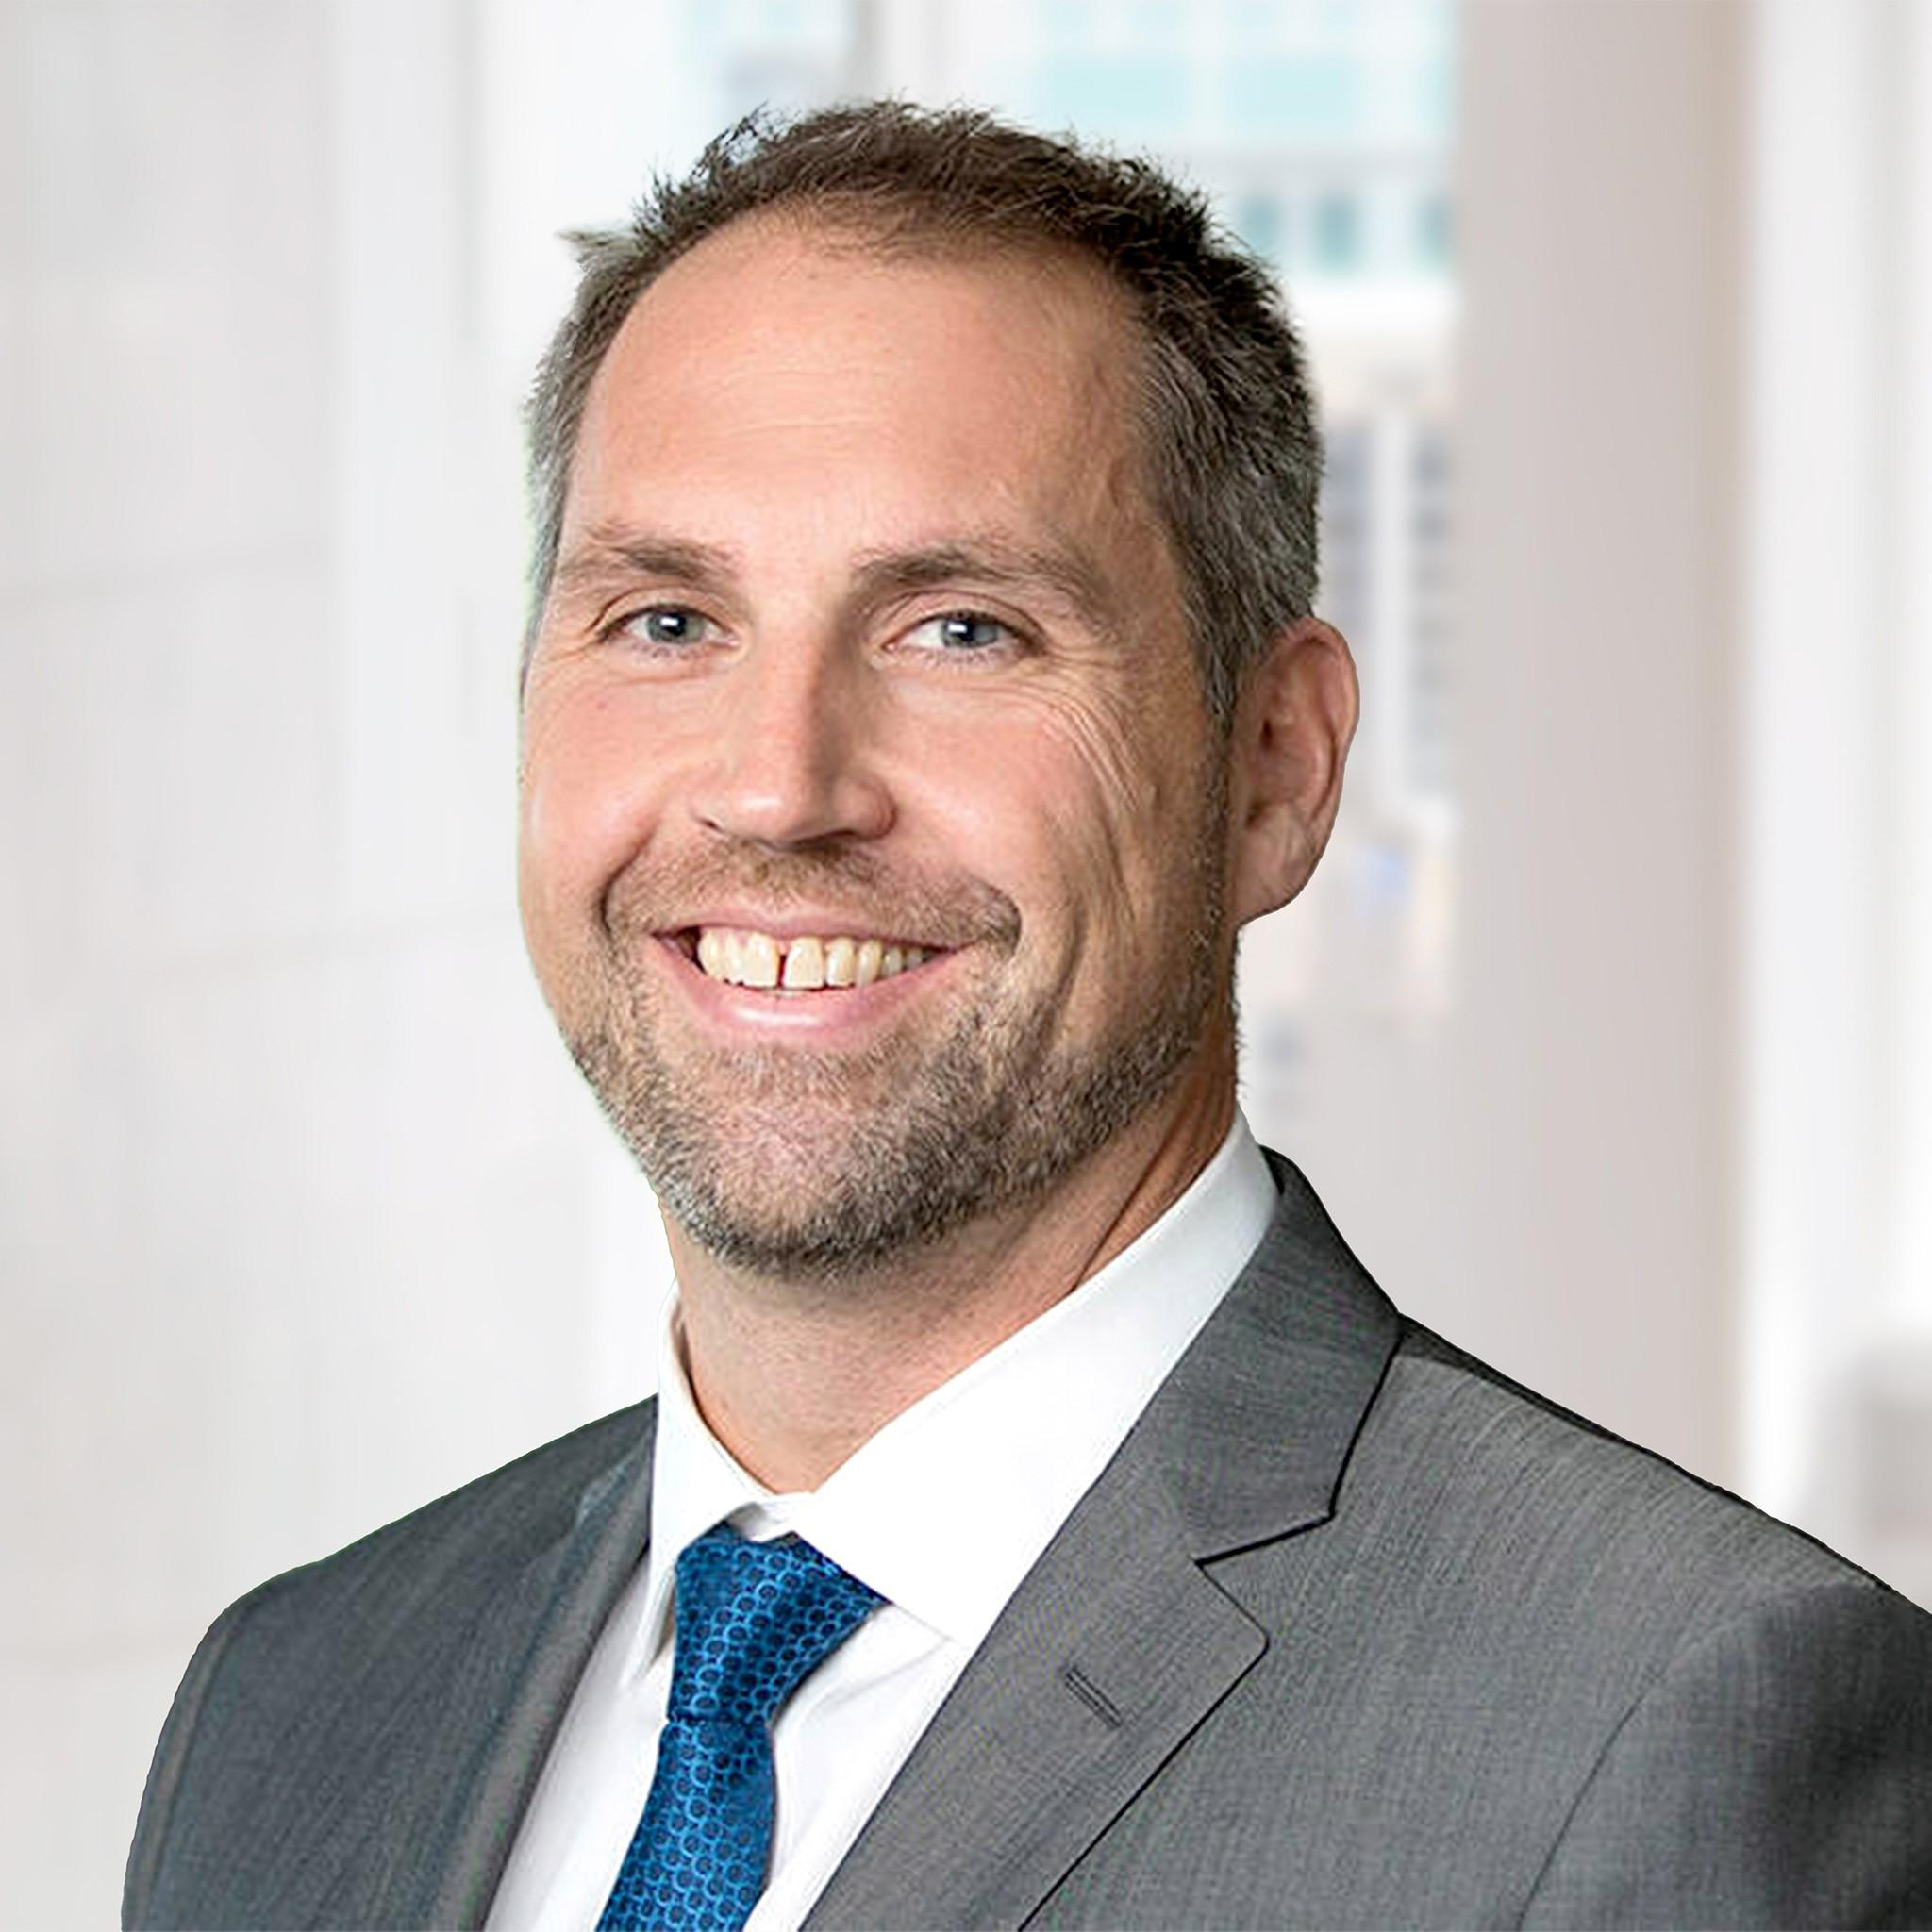

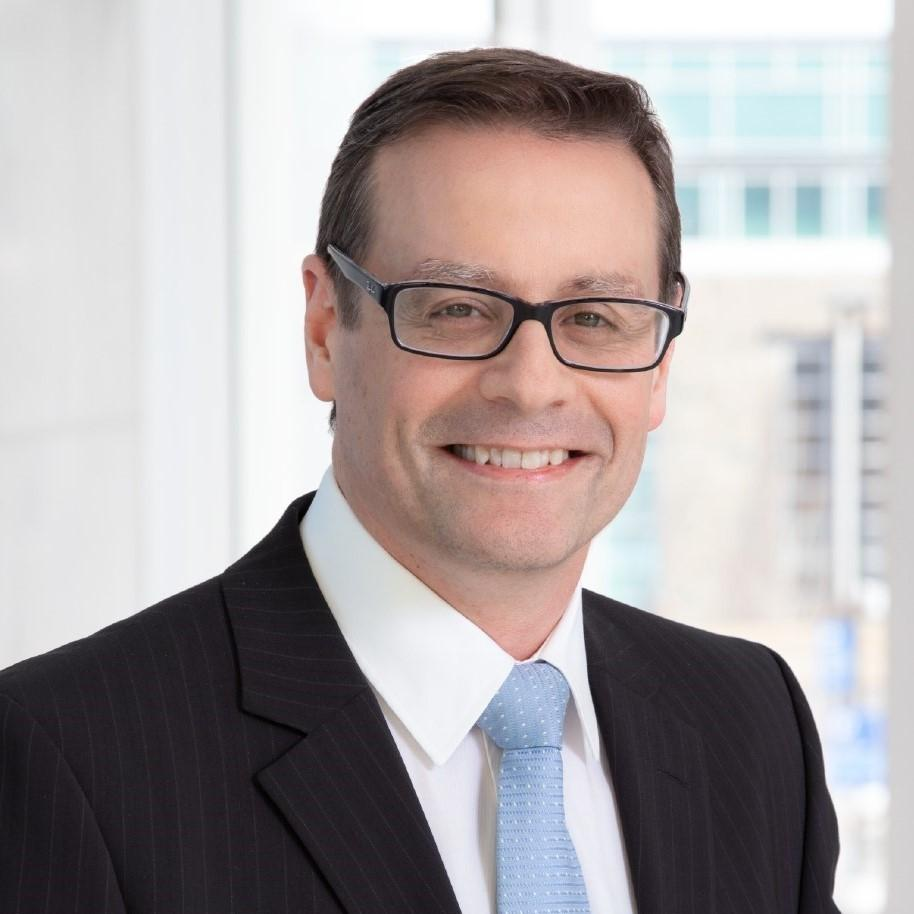

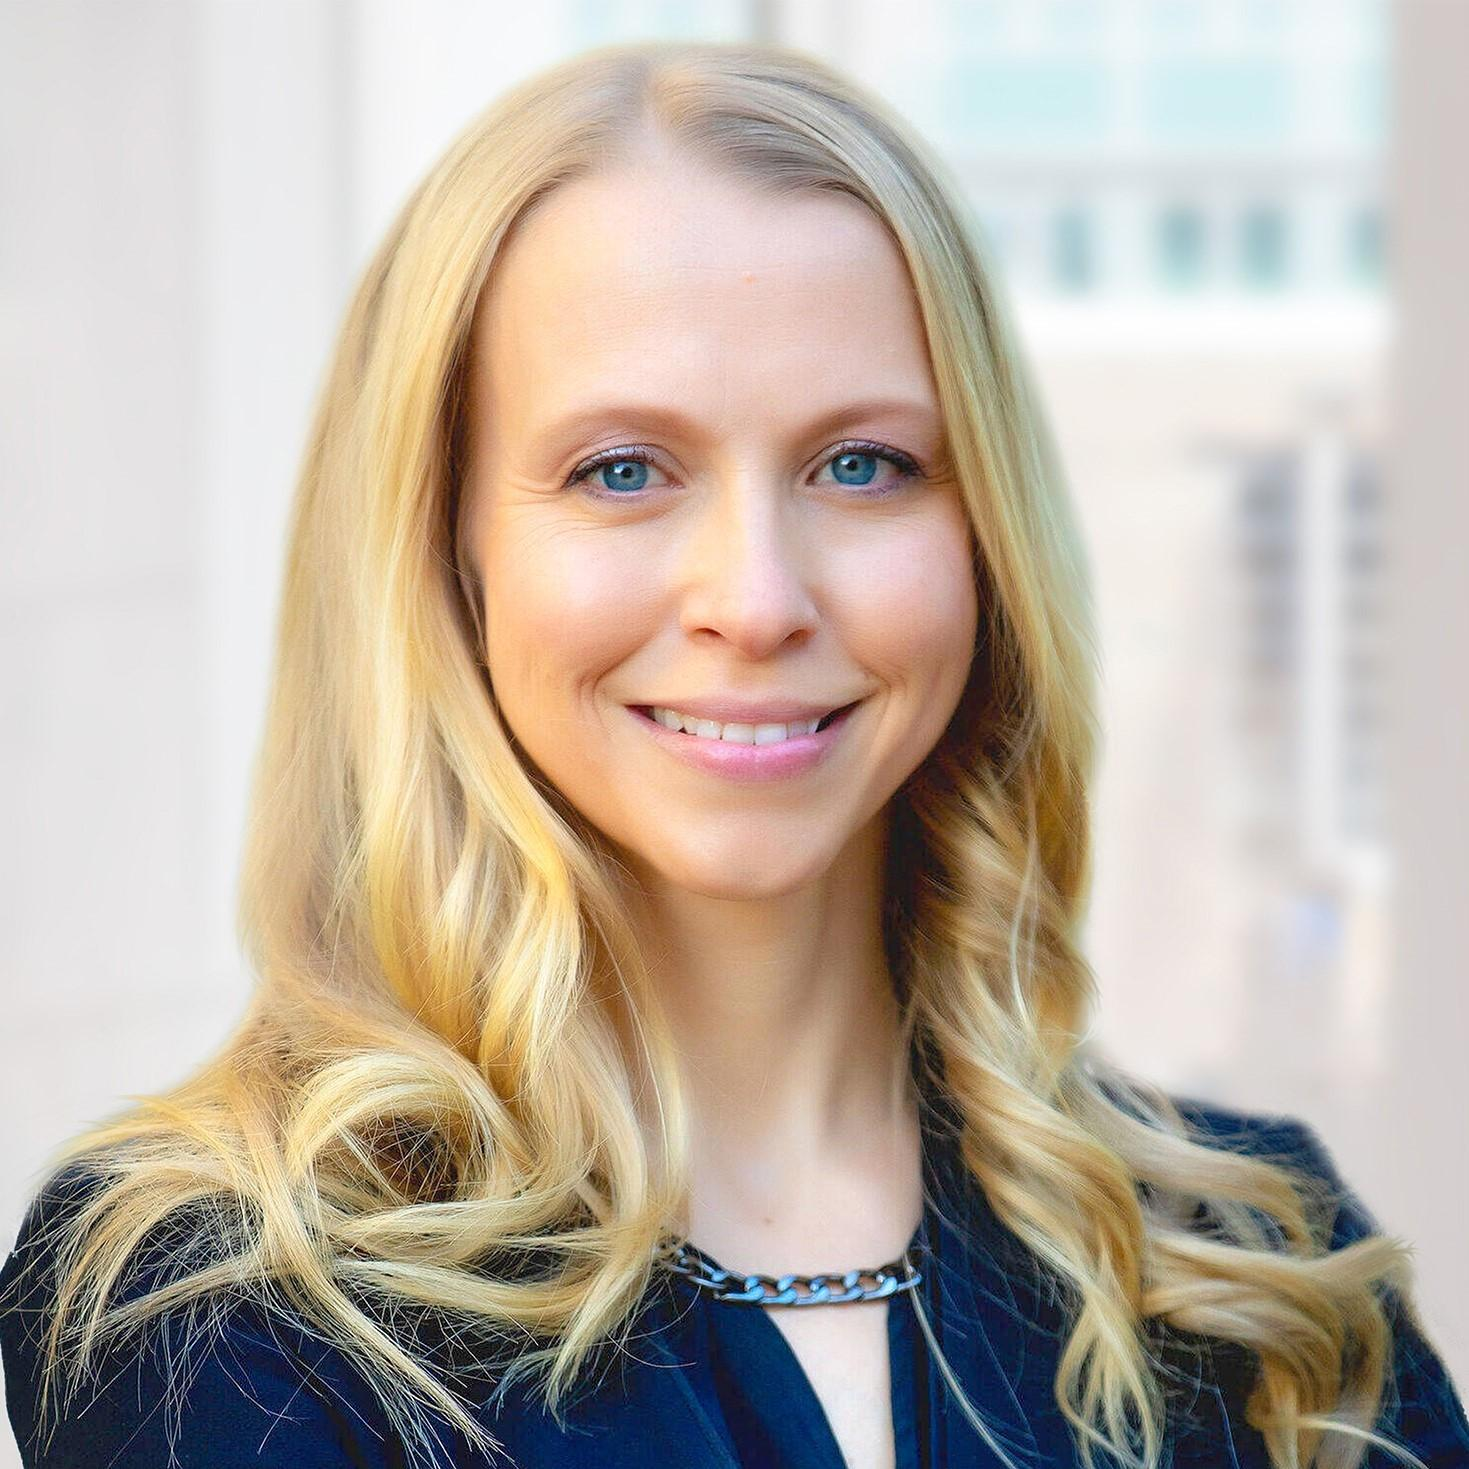

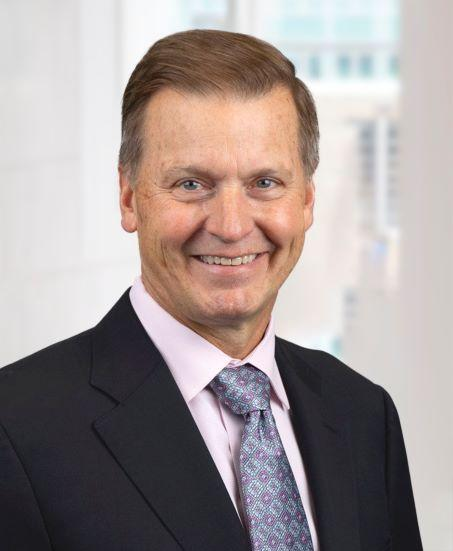

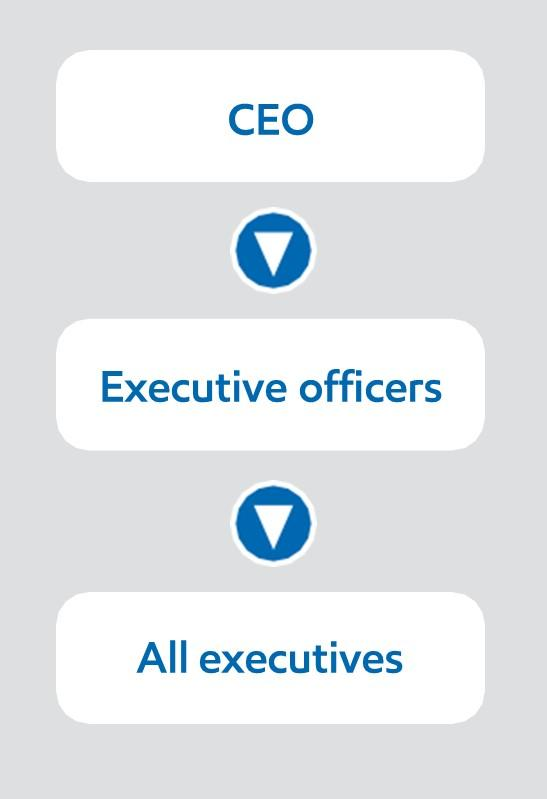

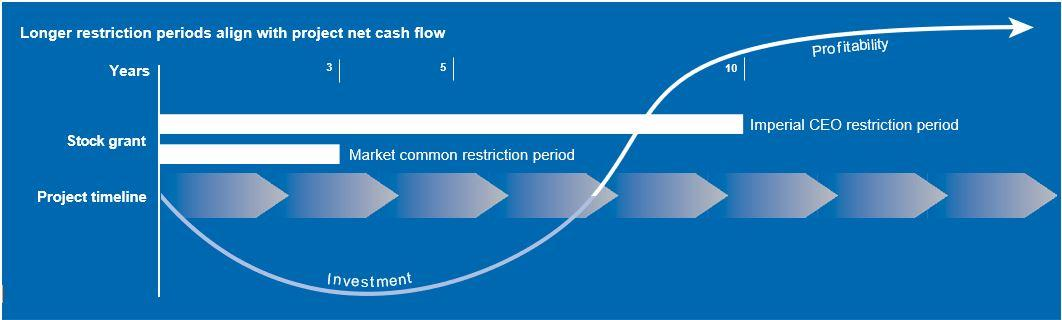

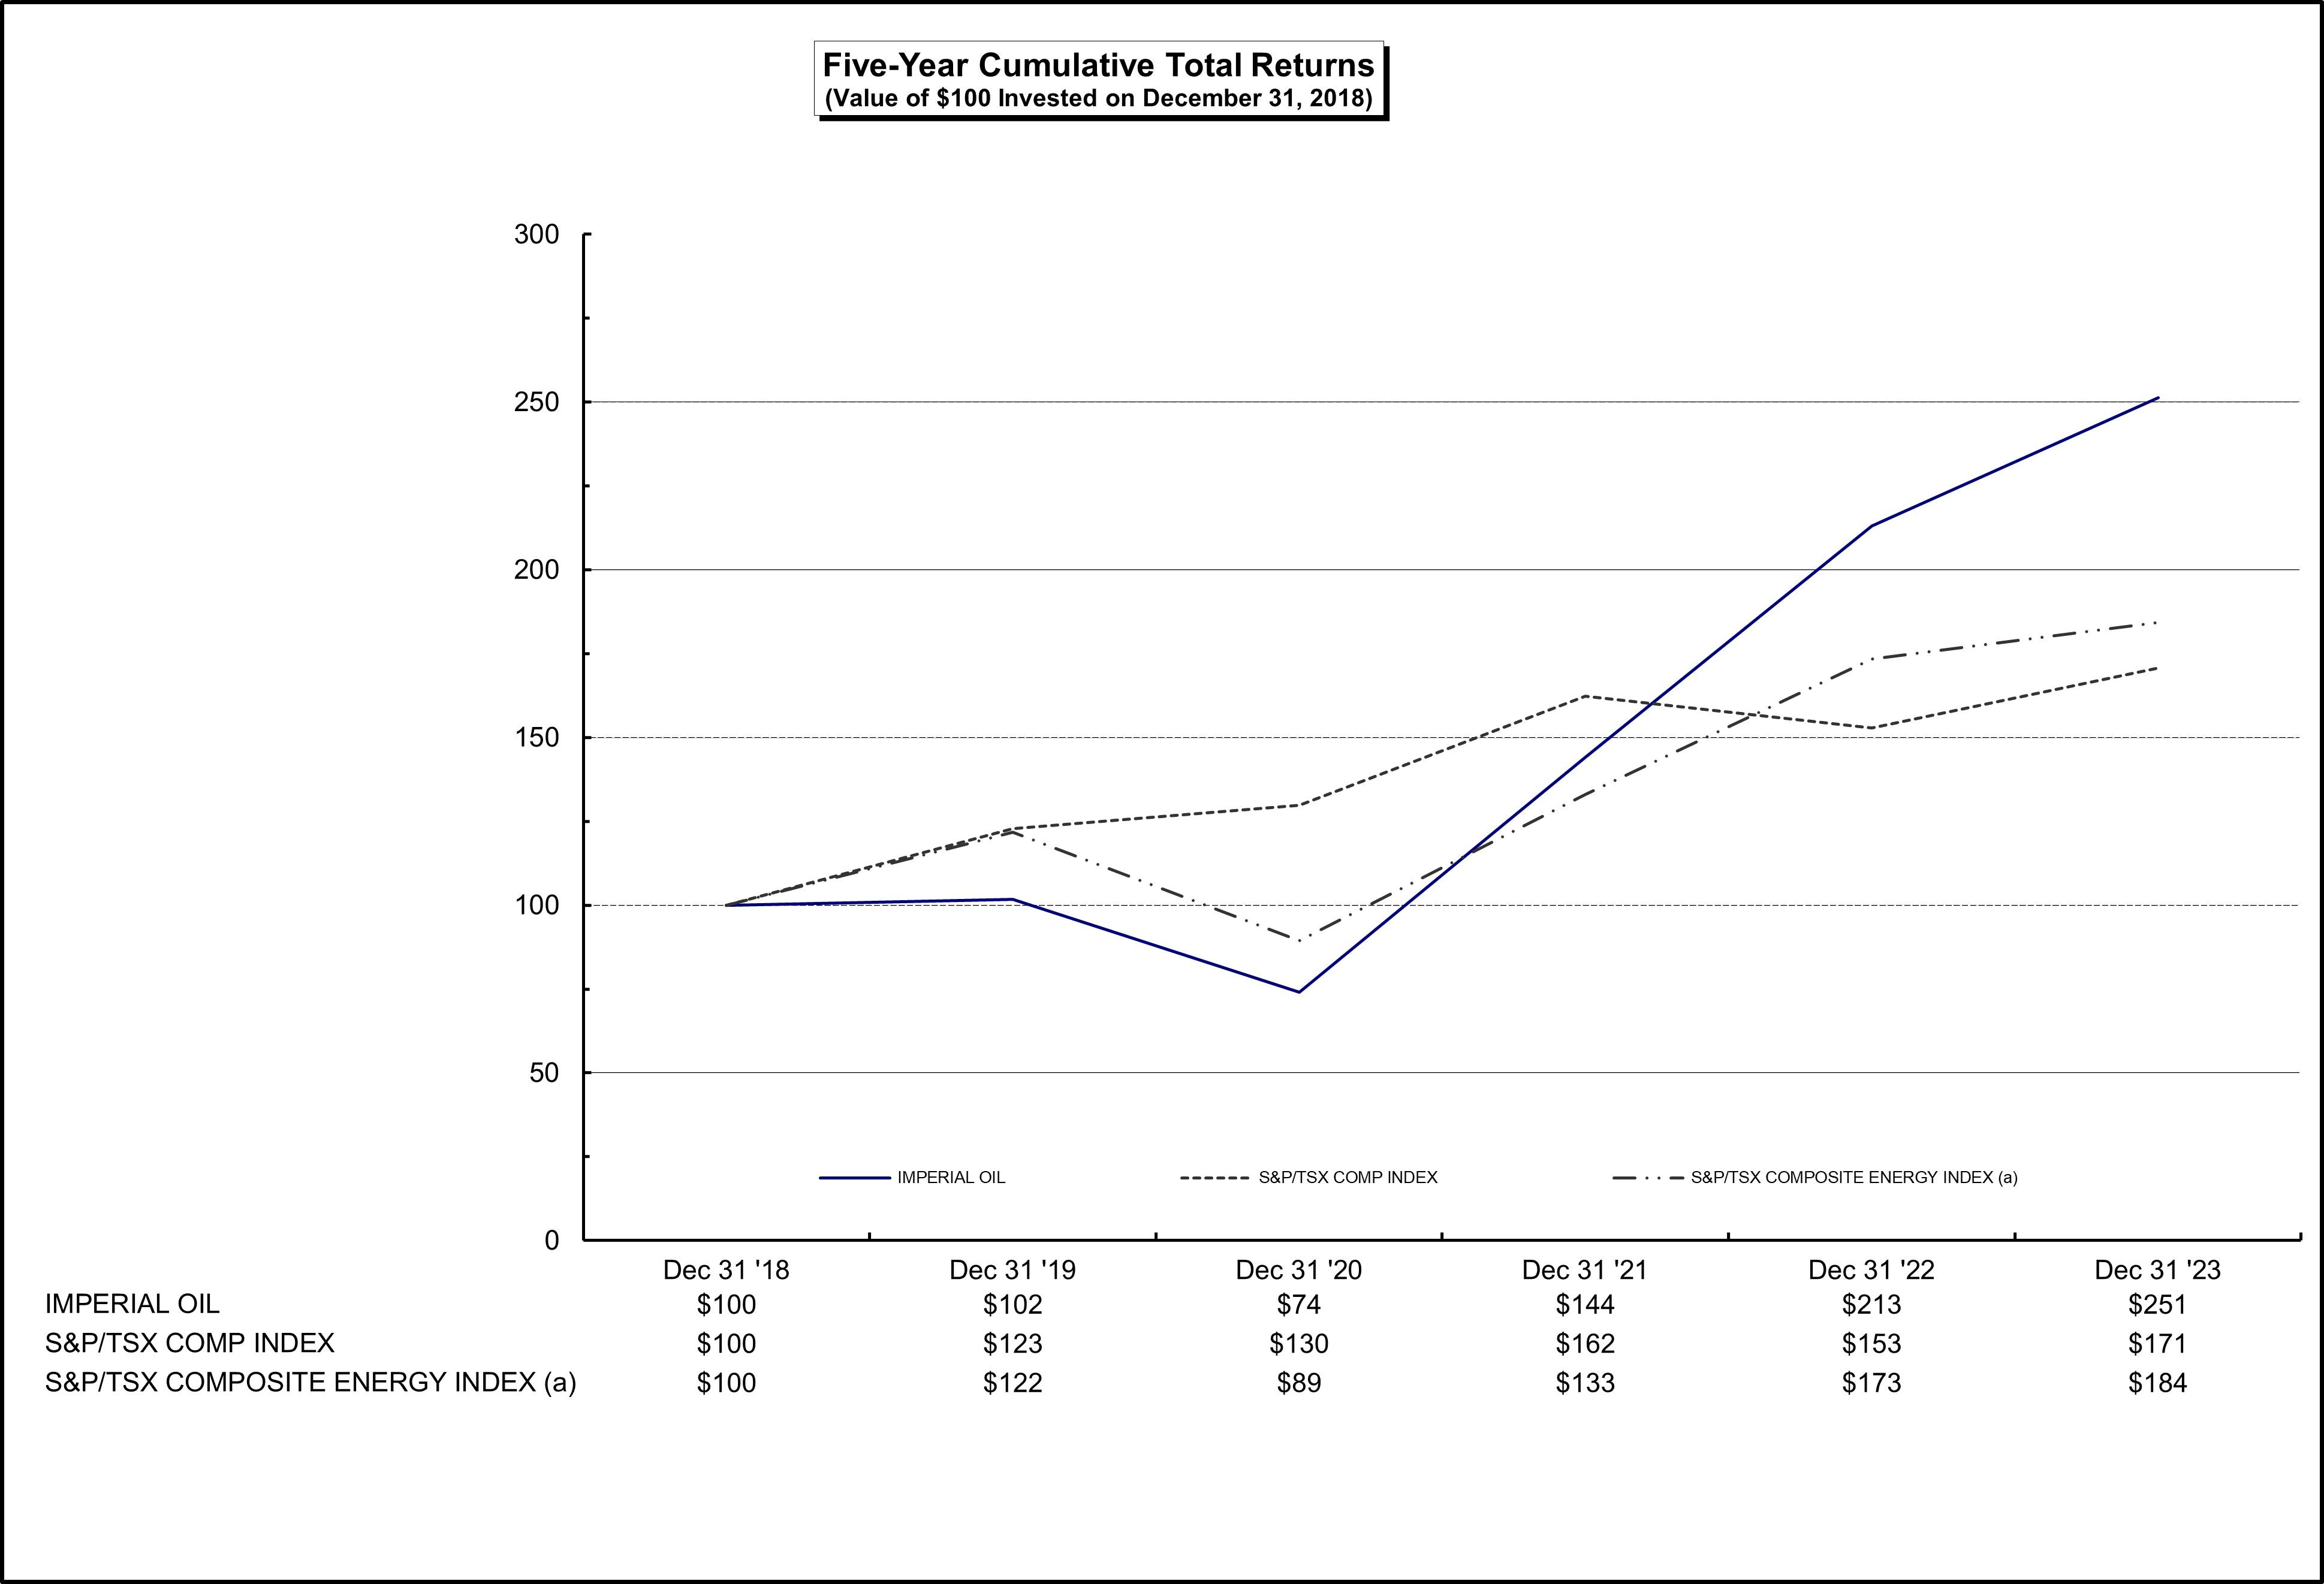

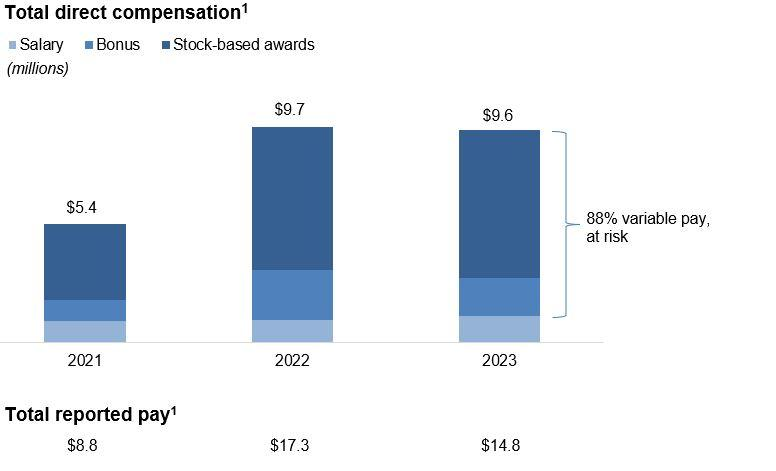

In [35]:
# this library is only for displaying the images in the Jupyter console - ignore as you wish
from IPython.display import Image, display

# initialize a pypdf reader for the 2023 Imperial Oil reporpt
pypdf_reader_2023 = PdfReader("../Data/Imperial Oil Annual Report 2023.pdf")

# loop over the pages
for page in pypdf_reader_2023.pages:
    for count, image_file_object in enumerate(page.images):
        # save each image to your working directory
        with open(str(count) + image_file_object.name, "wb") as fp:
            fp.write(image_file_object.data)
        # optional: display the image in the console
        display(Image(filename = str(count) + image_file_object.name, width = 300))

## Extracting Tables from PDFs

Using a combination of text and image extraction, some of these libraries can actually detect and extract tables from PDFs.

Note than this feature also performs best on digital pdfs, and doesn't always detect things that we as humans know to be tables.

The best implementaton by far is in `pypdf` - let's give it a try on a [Baltimore Police Department Weekly Incident Report](https://data.baltimorecity.gov/documents/aa87fd9ed6124db2b1c2aed8a5bf21cd/about) from [Open Baltimore](https://data.baltimorecity.gov/).

In [103]:
# try extracting tables with PyMuPDF

police_report = pymupdf.open("../Data/police_report_week12.pdf")

# we want to turn citywide summary table into a dataframe
# we will just take the first page since that is where the citywide summary is 
page = police_report[0]


# lets see how many tables we find on this page
tabs = page.find_tables()

for tab in tabs:
    df = tab.to_pandas()
    display(df)

HOMICIDE    1    4   -75     6    18  -67    50    78  -36
0               SHOOTING   11   11     0    37    33   12   124   150  -17
1                   RAPE    3    7   -57    12    16  -25    59    50   18
2   ROBBERY - CARJACKING    1    5   -80    26    30  -13   107   115   -7
3   ROBBERY - COMMERCIAL    6    6     0    30    34  -12   135   142   -5
4                ROBBERY   44   44     0   174   146   19   626   543   15
5          ROBBERY total   51   55    -7   230   210   10   868   800    8
6           AGG. ASSAULT  116  111     5   405   388    4  1383  1541  -10
7               BURGLARY   55   50    10   205   192    7   747   708    6
8                LARCENY  174  159     9   685   744   -8  2551  2819  -10
9      LARCENY FROM AUTO   52   55    -5   254   260   -2  1008   960    5
10         LARCENY total  226  214     6   939  1004   -6  3559  3779   -6
11            AUTO THEFT   99  115   -14   475   543  -13  2100  1512   39
12                 ARSON    0    2  -100     2     8  -75    23    32  -28
13              VIOLENCE  182  188    -3   690   665    4  2484  2619   -5
14              PROPERTY  380  381     0  1621  1747   -7  6429  6031    7
15                PART I  562  569    -1  2311  2412   -4  8913  8650    3

0-HOMICIDE 1-0 2-0 3-N/A  4-0  5-0 6-N/A  7-1  8-2 9--50
0               SHOOTING   1   1     0    2    0   INF    5    3    67
1                   RAPE   1   2   -50    3    4   -25   10   11    -9
2   ROBBERY - CARJACKING   0   0   N/A    0    0   N/A    0    1  -100
3   ROBBERY - COMMERCIAL   0   0   N/A    0    0   N/A    0    1  -100
4                ROBBERY   8   6    33   28   21    33   93   94    -1
5          ROBBERY total   8   6    33   28   21    33   93   96    -3
6           AGG. ASSAULT  36  40   -10  131  113    16  416  496   -16
7               BURGLARY   1   3   -67    6    7   -14   21   34   -38
8                LARCENY   3   1   200    9   14   -36   46  117   -61
9      LARCENY FROM AUTO   0   1  -100    1    0   INF    3    4   -25
10         LARCENY total   3   2    50   10   14   -29   49  121   -60
11            AUTO THEFT   0   1  -100    2    3   -33    6    8   -25
12                 ARSON   0   0   N/A    0    1  -100    2    1   100
13              VIOLENCE  46  49    -6  164  138    19  525  608   -14
14              PROPERTY   4   6   -33   18   25   -28   78  164   -52
15                PART I  50  55    -9  182  163    12  603  772   -22

Table 0 column names: ['HOMICIDE', '1', '4', '-75', '6', '18', '-67', '50', '78', '-36'], external: False
Table 1 column names: ['HOMICIDE', '0', '0', 'N/A', '0', '0', 'N/A', '1', '2', '-50'], external: False


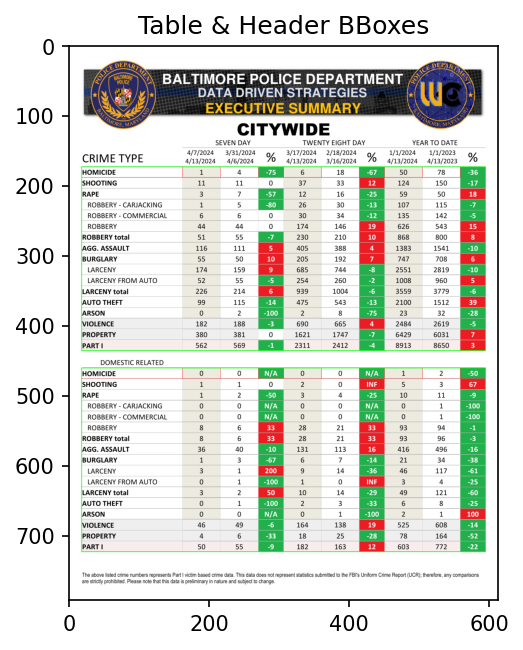

In [79]:
# the table reader wasn't able to capture the header for the tables - let's look into what's going on

tabs = page.find_tables()  # detect the tables
for i,tab in enumerate(tabs):  # iterate over all tables
    for cell in tab.header.cells:
        page.draw_rect(cell,color=fitz.pdfcolor["red"],width=0.3)
    page.draw_rect(tab.bbox,color=fitz.pdfcolor["green"])
    
show_image(page, f"Table & Header BBoxes")

In [82]:
# the table reader wasn't able to capture the header for the tables, so we'll have to find this ourselves

page_text = page.get_text()
print(page_text)

BALTIMORE POLICE DEPARTMENT
DATA DRIVEN STRATEGIES
EXECUTIVE SUMMARY
CITYWIDE
CRIME TYPE
SEVEN DAY
TWENTY EIGHT DAY
YEAR TO DATE
4/7/2024
4/13/2024
3/31/2024
4/6/2024
3/17/2024
4/13/2024
2/18/2024
3/16/2024
1/1/2024
4/13/2024
1/1/2023
4/13/2023
%
%
%
HOMICIDE
1
6
4
18
50
78
-75
-67
-36
SHOOTING
11
37
11
33
124
150
0
12
-17
RAPE
3
12
7
16
59
50
-57
-25
18
   ROBBERY - CARJACKING
1
26
5
30
107
115
-80
-13
-7
   ROBBERY - COMMERCIAL
6
30
6
34
135
142
0
-12
-5
   ROBBERY
44
174
44
146
626
543
0
19
15
ROBBERY total
51
230
55
210
868
800
-7
10
8
AGG. ASSAULT
116
405
111
388
1383
1541
5
4
-10
BURGLARY
55
205
50
192
747
708
10
7
6
   LARCENY
174
685
159
744
2551
2819
9
-8
-10
   LARCENY FROM AUTO
52
254
55
260
1008
960
-5
-2
5
LARCENY total
226
939
214
1004
3559
3779
6
-6
-6
AUTO THEFT
99
475
115
543
2100
1512
-14
-13
39
ARSON
0
2
2
8
23
32
-100
-75
-28
VIOLENCE
182
690
188
665
2484
2619
-3
4
-5
PROPERTY
380
1621
381
1747
6429
6031
0
-7
7
PART I
562
2311
569
2412
8913
8650
-1
-4
3
DOMESTIC REL

Everything is a bit out of order... but we know a couple things about how our document is structured that can help us set up the headers

the pattern is: two 7-day counts, followed by the 7-day percent change, two 28-day counts, followed by the 28-day percent change, two YTD counts, followed by the YTD percent change

The variable part here across documents will be the actual dates, so lets extract those and start building our header from there.

In [92]:
# extract the text between YEAR TO DATE and the first %, then turn this into a list of dates
table_dates = page_text[page_text.find("YEAR TO DATE")+len("YEAR TO DATE"):page_text.find("%")].split()

print(table_dates)

# convert to a more standard datetime format?

['4/7/2024', '4/13/2024', '3/31/2024', '4/6/2024', '3/17/2024', '4/13/2024', '2/18/2024', '3/16/2024', '1/1/2024', '4/13/2024', '1/1/2023', '4/13/2023']


In [98]:
# now we're ready to construct our header

header_list = ["Crime type",
               table_dates[0] + "-" + table_dates[1],
              table_dates[2] + "-" + table_dates[3],
              "7-day percent change", 
               table_dates[4] + "-" + table_dates[5],
              table_dates[6] + "-" + table_dates[7],
               "28-day percent change", 
               table_dates[8] + "-" + table_dates[9],
              table_dates[10] + "-" + table_dates[11],
               "YTD percent change"]

print(header_list)

['Crime type', '4/7/2024-4/13/2024', '3/31/2024-4/6/2024', '7-day percent change', '3/17/2024-4/13/2024', '2/18/2024-3/16/2024', '28-day percent change', '1/1/2024-4/13/2024', '1/1/2023-4/13/2023', 'YTD percent change']


In [99]:
# lets apply our snazzy new header to the dataframes we've create

for tab in tabs:
    df = tab.to_pandas()
    df.columns = header_list
    display(df)

Crime type 4/7/2024-4/13/2024 3/31/2024-4/6/2024  \
0               SHOOTING                 11                 11   
1                   RAPE                  3                  7   
2   ROBBERY - CARJACKING                  1                  5   
3   ROBBERY - COMMERCIAL                  6                  6   
4                ROBBERY                 44                 44   
5          ROBBERY total                 51                 55   
6           AGG. ASSAULT                116                111   
7               BURGLARY                 55                 50   
8                LARCENY                174                159   
9      LARCENY FROM AUTO                 52                 55   
10         LARCENY total                226                214   
11            AUTO THEFT                 99                115   
12                 ARSON                  0                  2   
13              VIOLENCE                182                188   
14              PROPERTY                380                381   
15                PART I                562                569   

   7-day percent change 3/17/2024-4/13/2024 2/18/2024-3/16/2024  \
0                     0                  37                  33   
1                   -57                  12                  16   
2                   -80                  26                  30   
3                     0                  30                  34   
4                     0                 174                 146   
5                    -7                 230                 210   
6                     5                 405                 388   
7                    10                 205                 192   
8                     9                 685                 744   
9                    -5                 254                 260   
10                    6                 939                1004   
11                  -14                 475                 543   
12                 -100                   2                   8   
13                   -3                 690                 665   
14                    0                1621                1747   
15                   -1                2311                2412   

   28-day percent change 1/1/2024-4/13/2024 1/1/2023-4/13/2023  \
0                     12                124                150   
1                    -25                 59                 50   
2                    -13                107                115   
3                    -12                135                142   
4                     19                626                543   
5                     10                868                800   
6                      4               1383               1541   
7                      7                747                708   
8                     -8               2551               2819   
9                     -2               1008                960   
10                    -6               3559               3779   
11                   -13               2100               1512   
12                   -75                 23                 32   
13                     4               2484               2619   
14                    -7               6429               6031   
15                    -4               8913               8650   

   YTD percent change  
0                 -17  
1                  18  
2                  -7  
3                  -5  
4                  15  
5                   8  
6                 -10  
7                   6  
8                 -10  
9                   5  
10                 -6  
11                 39  
12                -28  
13                 -5  
14                  7  
15                  3

Crime type 4/7/2024-4/13/2024 3/31/2024-4/6/2024  \
0               SHOOTING                  1                  1   
1                   RAPE                  1                  2   
2   ROBBERY - CARJACKING                  0                  0   
3   ROBBERY - COMMERCIAL                  0                  0   
4                ROBBERY                  8                  6   
5          ROBBERY total                  8                  6   
6           AGG. ASSAULT                 36                 40   
7               BURGLARY                  1                  3   
8                LARCENY                  3                  1   
9      LARCENY FROM AUTO                  0                  1   
10         LARCENY total                  3                  2   
11            AUTO THEFT                  0                  1   
12                 ARSON                  0                  0   
13              VIOLENCE                 46                 49   
14              PROPERTY                  4                  6   
15                PART I                 50                 55   

   7-day percent change 3/17/2024-4/13/2024 2/18/2024-3/16/2024  \
0                     0                   2                   0   
1                   -50                   3                   4   
2                   N/A                   0                   0   
3                   N/A                   0                   0   
4                    33                  28                  21   
5                    33                  28                  21   
6                   -10                 131                 113   
7                   -67                   6                   7   
8                   200                   9                  14   
9                  -100                   1                   0   
10                   50                  10                  14   
11                 -100                   2                   3   
12                  N/A                   0                   1   
13                   -6                 164                 138   
14                  -33                  18                  25   
15                   -9                 182                 163   

   28-day percent change 1/1/2024-4/13/2024 1/1/2023-4/13/2023  \
0                    INF                  5                  3   
1                    -25                 10                 11   
2                    N/A                  0                  1   
3                    N/A                  0                  1   
4                     33                 93                 94   
5                     33                 93                 96   
6                     16                416                496   
7                    -14                 21                 34   
8                    -36                 46                117   
9                    INF                  3                  4   
10                   -29                 49                121   
11                   -33                  6                  8   
12                  -100                  2                  1   
13                    19                525                608   
14                   -28                 78                164   
15                    12                603                772   

   YTD percent change  
0                  67  
1                  -9  
2                -100  
3                -100  
4                  -1  
5                  -3  
6                 -16  
7                 -38  
8                 -61  
9                 -25  
10                -60  
11                -25  
12                100  
13                -14  
14                -52  
15                -22

From the PDF, we can see that the two datasets on the page have the same variables, but the second dataset covers "domestic-related" crimes. Let's combine them and create a new variable for whether the crime was domestic.

We know there will always be 2 dataframe per page, so no need to bother with a for loop

In [101]:
import pandas as pd

df_1 = tabs[0].to_pandas()
df_1.columns = header_list
df_1["domestic"] = False

df_2 = tabs[1].to_pandas()
df_2.columns = header_list
df_2["domestic"] = True

df = pd.concat([df_1, df_2]).reset_index()

df

index            Crime type 4/7/2024-4/13/2024 3/31/2024-4/6/2024  \
0       0              SHOOTING                 11                 11   
1       1                  RAPE                  3                  7   
2       2  ROBBERY - CARJACKING                  1                  5   
3       3  ROBBERY - COMMERCIAL                  6                  6   
4       4               ROBBERY                 44                 44   
5       5         ROBBERY total                 51                 55   
6       6          AGG. ASSAULT                116                111   
7       7              BURGLARY                 55                 50   
8       8               LARCENY                174                159   
9       9     LARCENY FROM AUTO                 52                 55   
10     10         LARCENY total                226                214   
11     11            AUTO THEFT                 99                115   
12     12                 ARSON                  0                  2   
13     13              VIOLENCE                182                188   
14     14              PROPERTY                380                381   
15     15                PART I                562                569   
16      0              SHOOTING                  1                  1   
17      1                  RAPE                  1                  2   
18      2  ROBBERY - CARJACKING                  0                  0   
19      3  ROBBERY - COMMERCIAL                  0                  0   
20      4               ROBBERY                  8                  6   
21      5         ROBBERY total                  8                  6   
22      6          AGG. ASSAULT                 36                 40   
23      7              BURGLARY                  1                  3   
24      8               LARCENY                  3                  1   
25      9     LARCENY FROM AUTO                  0                  1   
26     10         LARCENY total                  3                  2   
27     11            AUTO THEFT                  0                  1   
28     12                 ARSON                  0                  0   
29     13              VIOLENCE                 46                 49   
30     14              PROPERTY                  4                  6   
31     15                PART I                 50                 55   

   7-day percent change 3/17/2024-4/13/2024 2/18/2024-3/16/2024  \
0                     0                  37                  33   
1                   -57                  12                  16   
2                   -80                  26                  30   
3                     0                  30                  34   
4                     0                 174                 146   
5                    -7                 230                 210   
6                     5                 405                 388   
7                    10                 205                 192   
8                     9                 685                 744   
9                    -5                 254                 260   
10                    6                 939                1004   
11                  -14                 475                 543   
12                 -100                   2                   8   
13                   -3                 690                 665   
14                    0                1621                1747   
15                   -1                2311                2412   
16                    0                   2                   0   
17                  -50                   3                   4   
18                  N/A                   0                   0   
19                  N/A                   0                   0   
20                   33                  28                  21   
21                   33                  28                  21   
22                  -10                 131          